# Photometric Color correction in FGCM Model with redshifted SED

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : December 11th 2022
- update : December 11th 2022

## Goal Study color bias wrt airmass

### Interpretable standard magnitude expression : option A : with zero point as unit observed counting rate

$$
\begin{eqnarray}
m_b^{std} & = &  -2.5 \log_{10}(C_b^{obs})+ 2.5 \log_{10}\left(\frac{\mathbb{I}_0^{std}(b)}{\mathbb{I}_0^{obs}}\right) + m_b^{obs}(ZPT)   \nonumber \\
 & & + 2.5 \log_{10} 
	\left( 
	\frac{\int_0^\infty F_\nu(\lambda) \times S_b^{obs}(\lambda) \frac{d\lambda}{\lambda} }{\int_0^\infty F_\nu(\lambda) \times S_b^{std}(\lambda) \frac{d\lambda}{\lambda}} 
	\right)
\end{eqnarray}
$$

### Interpretable standard magnitude expression : option B : with zero point as constant

$$
\begin{eqnarray}
m_b^{std} & = &  -2.5 \log_{10}(C_b^{obs})+ 2.5 \log_{10}\left(\mathbb{I}_0^{std}(b)\right) + ZPT^{AB}   \nonumber \\
 & & + 2.5 \log_{10} 
	\left( 
	\frac{\int_0^\infty F_\nu(\lambda) \times S_b^{obs}(\lambda) \frac{d\lambda}{\lambda} }{\int_0^\infty F_\nu(\lambda) \times S_b^{std}(\lambda) \frac{d\lambda}{\lambda}} 
	\right)
\end{eqnarray}
$$

### Standard Magnitude wit SED approximation

- we don't know the exact SED of some reference calibration stars (in LSST, for Auxtel)

$$
F_{\nu}(\lambda) = F_\nu(\lambda_b) \times \left(1 + f_\nu^\prime(\lambda_b)(\lambda-\lambda_b) + \frac{f_\nu^{\prime\prime}(\lambda_b)}{2}(\lambda-\lambda_b)^2 + \cdots \right)
$$

$$
\begin{eqnarray}
m_b^{std} & = & -2.5 \log_{10}(C_b)  \nonumber \\
          &   &  + 2.5 \log_{10}(\mathbb{I}_0^{obs}(b)) + ZPT^{AB}  \nonumber \\
          &   &  + 1.087\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) +
          \frac{f_\nu^{\prime\prime}(\lambda_b)}{2}\Delta \mathbb{I}_{20}(b) \right. 
         - \left. \frac{1}{2}\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) \right)^2             
          \right)
\end{eqnarray}
$$

### Error on Color Photometric Correction
$$
\begin{eqnarray}
\Delta m & = & \left| 2.5 \log_{10}\left(
\frac{\mathbb{I}_0^{std}(b)}
{\mathbb{I}_0^{obs}(b)}\right) +
2.5 \log_{10} 
	\left( 
	\frac{\int_0^\infty F_\nu(\lambda) \times S_b^{obs}(\lambda) \frac{d\lambda}{\lambda} }{\int_0^\infty F_\nu(\lambda) \times S_b^{std}(\lambda) \frac{d\lambda}{\lambda}} 
	\right) \right. \nonumber \\
    & & \left. - 1.087\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) +
          \frac{f_\nu^{\prime\prime}(\lambda_b)}{2}\Delta \mathbb{I}_{20}(b) \right. 
         - \left. \frac{1}{2}\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) \right)^2             
          \right)\right|
\end{eqnarray}  
$$

## Import

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [4]:
from scipy import interpolate

In [5]:
# Import the primary photometry classes from rubin_sim.photUtils

import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed
from rubin_sim.data import get_data_dir

In [6]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')
# pysynphot
import pysynphot as S
S.refs.setref(area=1)
S.refs.getref()

{'graphtable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits',
 'comptable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits',
 'thermtable': '/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits',
 'area': 1,
 'waveset': 'Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True'}

In [7]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import copy

## Configuration

### LSST Throughput

In [10]:
path_throughput="/sps/lsst/groups/auxtel/softs/github/desc/throughputs/baseline"
path_throughput=os.path.join(os.getenv("HOME"),"rubin_sim_data/throughputs/baseline") 

In [11]:
atm_std_filename = "atmos_std.dat"

In [12]:
filter_filenames = ["total_u.dat","total_g.dat","total_r.dat","total_i.dat","total_z.dat","total_y.dat" ]
filter_tagnames = ["u","g","r","i","z","y"]
Filter_tagnames = ["U","G","R","I","Z","Y"]
filtercolor_tagnames = ["u-g","g-r","r-i","i-z","z-y"]
Filtercolor_tagnames = ["U-G","G-R","R-I","I-Y","Z-Y"]
filter_color = ["b","g","r","orange","grey","k"]
NFILT=len(filter_filenames)

### Wavelength range and sampling

In [13]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

In [14]:
assert NWLBIN == len(WL)

### Backup observed air transparency

In [15]:
FLAG_BACKUP_ATMSIM = True
FLAG_ATMSIM_READFROMFILE = True
atmsim_backup_filename = "atmossim_obs_varyairmass_16values.dat"

### Replace the standard atmosphere

In [16]:
FLAG_REPLACE_STANDARD_ATMOS = True
index_replace_atm=2

## Initialisation

In [17]:
df_std=pd.DataFrame()

In [18]:
df_std["wl"] = WL

### Standard atmosphere

In [19]:
fullfilename=os.path.join(path_throughput,atm_std_filename)

In [20]:
arr= np.loadtxt(fullfilename)

In [21]:
#f = interpolate.interp1d(x=arr[:,0], y=arr[:,1],fill_value="extrapolate")
f = interpolate.interp1d(x=arr[:,0], y=arr[:,1],fill_value=1)

In [22]:
atm_std=f(WL)

In [23]:
df_std["atm"] = atm_std

### Total filters

FILTERWL:

- index 0 : minimum wavelength of filter border
- index 1 : minimum wavelength of filter border
- index 2 : center wavelength of filter 
- index 3 : filter width

In [24]:
FILTERWL = np.zeros((NFILT,4))

# loop on filter
for index,filename in enumerate(filter_filenames):
    fullfilename=os.path.join(path_throughput,filename)
    arr= np.loadtxt(fullfilename)
    
    # interpolate  filter transmission
    ff = interpolate.interp1d(x=arr[:,0], y=arr[:,1],fill_value="extrapolate")
    
    # filter throughput including atm
    throughput1=ff(WL)
    # filter throughput without atm
    throughput2=throughput1/atm_std
    
    tag1="tot_"+filter_tagnames[index]
    tag2="inst_"+filter_tagnames[index]
    
    df_std[tag1]= throughput1
    df_std[tag2]= throughput2
    
    indexes=np.where(throughput2>0.05)[0]
    #left border of filter
    FILTERWL[index,0]=WL[indexes.min()] 
    # right border of the filter
    FILTERWL[index,1]=WL[indexes.max()] 
    # width of the filter
    FILTERWL[index,3]=WL[indexes.max()]-WL[indexes.min()]  
    #lambda_b
    lambdab=np.trapz(throughput2,WL)/np.trapz(throughput2/WL,WL)
    FILTERWL[index,2]=lambdab

In [25]:
FILTERWL

array([[ 324.03003755,  402.12765957,  363.59690349,   78.09762203],
       [ 392.11514393,  561.32665832,  473.54069923,  169.21151439],
       [ 542.3028786 ,  700.50062578,  619.49926767,  158.19774718],
       [ 681.47684606,  827.65957447,  752.01084117,  146.18272841],
       [ 808.63579474,  932.79098874,  868.488419  ,  124.15519399],
       [ 914.76846058, 1044.93116395,  969.10570859,  130.16270338]])

Text(0.5, 1.0, 'Instrument transmission')

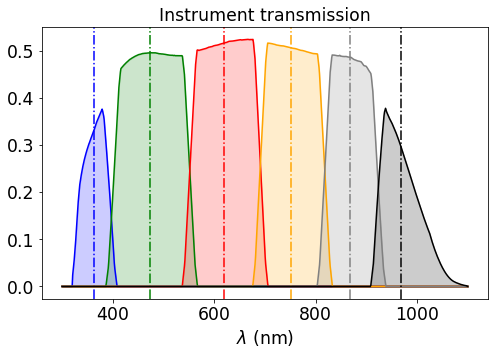

In [26]:
fig, axs = plt.subplots(1,1,figsize=(8,5))
for index in range(NFILT):
    tag="inst_"+filter_tagnames[index]
    axs.plot(WL,df_std[tag].values,color=filter_color[index]) 
    axs.fill_between(WL,df_std[tag].values,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    #plt.axvline(FILTERWL[index,0],color=filter_color[index],linestyle=":")
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument transmission")

Text(0.5, 1.0, 'Instrument and atmosphere transmission')

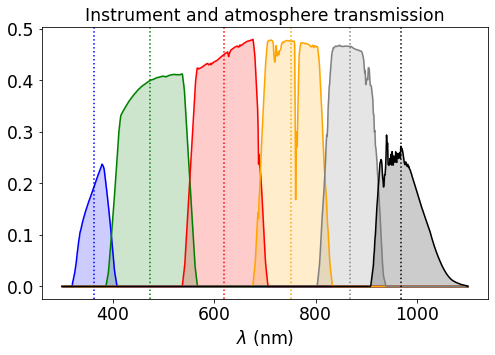

In [27]:
fig, axs = plt.subplots(1,1,figsize=(8,5))
for index in range(NFILT):
    tag="tot_"+filter_tagnames[index]
    axs.plot(WL,df_std[tag].values,color=filter_color[index]) 
    axs.fill_between(WL,df_std[tag].values,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle=":")
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument and atmosphere transmission")

In [28]:
df_std.head()

wl       atm  tot_u  inst_u  tot_g  inst_g  tot_r  inst_r  tot_i  \
0  300.000000  0.006410    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
1  301.001252  0.011915    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
2  302.002503  0.017428    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
3  303.003755  0.026622    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
4  304.005006  0.035820    0.0     0.0    0.0     0.0    0.0     0.0    0.0   

   inst_i  tot_z  inst_z  tot_y  inst_y  
0     0.0    0.0     0.0    0.0     0.0  
1     0.0    0.0     0.0    0.0     0.0  
2     0.0    0.0     0.0    0.0     0.0  
3     0.0    0.0     0.0    0.0     0.0  
4     0.0    0.0     0.0    0.0     0.0

## Functions

### Functions on passband Integrals 

$$
\mathbb{I}_0(b) \equiv \int_0^\infty S_b(\lambda) \frac{d\lambda}{\lambda}
$$

In [29]:
def fII0(wl,s):
    return np.trapz(s/wl,wl)

$$
\mathbb{I}_1(b) \equiv \int_0^\infty S_b(\lambda)(\lambda - \lambda_b) \frac{d\lambda}{\lambda}
$$

In [30]:
def fII1(wl,s,wlb):
    return np.trapz(s*(wl-wlb)/wl,wl)

$$
\mathbb{I}_2(b) \equiv \int_0^\infty S_b(\lambda)(\lambda-\lambda_b)^2 \frac{d\lambda}{\lambda}
$$

In [31]:
def fII2(wl,s,wlb):
    return np.trapz(s*(wl-wlb)**2/wl,wl)

$$
\mathbb{I}_{10}(b) \equiv \frac{\mathbb{I}_{1}(b)}{\mathbb{I}_{0}(b)}
$$

In [32]:
def fII10(wl,s,wlb):
    return fII1(wl,s,wlb)/fII0(wl,s)

$$
\mathbb{I}_{20}(b) \equiv \frac{\mathbb{I}_{2}(b)}{\mathbb{I}_{0}(b)}
$$

In [33]:
def fII20(wl,s,wlb):
    return fII2(wl,s,wlb)/fII0(wl,s)

### CalculateIIntegrals(df_S,wlb)

In [34]:
def CalculateIIntegrals(df_S,wlb):
    """
    
    input : 
     - df_S : dataframe containing transmission (atmosphere + instrument) 
     - lambda_b : center of passband
     
    output:
     - dataframe containing the integrals II0,II1,II2, II10, II20 for each filter (u,g,r,i,z,y)
     
    """
    II0 = np.zeros(NFILT)
    II1 = np.zeros(NFILT)
    II2 = np.zeros(NFILT)
    II10 = np.zeros(NFILT)
    II20 = np.zeros(NFILT)
    
    for index in range(NFILT):
        tag="tot_"+filter_tagnames[index]
        wl=df_S["wl"].values
        S=df_S[tag].values
        II0[index] = fII0(wl,S)
        II1[index] = fII1(wl,S,wlb[index])
        II2[index] = fII2(wl,S,wlb[index])
        II10[index] = fII10(wl,S,wlb[index])
        II20[index] = fII20(wl,S,wlb[index])
        
    df_II = pd.DataFrame()
    df_II["II0"]=II0
    df_II["II1"]=II1
    df_II["II2"]=II2
    df_II["II10"]=II10
    df_II["II20"]=II20    
    return df_II
    

## Calculate Integrals for Standard atmosphere

### Function SED integrals

- compute average over passband

$$
\frac{
\int_0^\infty q(\lambda) S_b^{tot} \frac{d\lambda}{\lambda}
}
{
\int_0^\infty  S_b^{tot} \frac{d\lambda}{\lambda}
}
$$

In [35]:
def ComputeAverage(the_wl,the_q,df_S):
    """
    
    input parameters:
      - the_wl : the wavelength array of the quantity over which one integrate
      - the_q : the quantity over which one integrate (ex the SED flux)
      - df_S : the passbands over which one integrates
      
    output:
      - all_qq_average : average over the_q in each passband (array)
      
    """
    
    
    # quantity that must be average
    func = interpolate.interp1d(x=the_wl, y=the_q,fill_value="extrapolate")
    qq_interp = func(WL)
    
    # Output for the average
    all_qq_average= np.zeros(NFILT)
    
    # loop on filters
    for index in range(NFILT):
        tag="tot_"+filter_tagnames[index]
        wl=df_S["wl"].values
        S = df_S[tag].values
        # weight for the average
        W = S/wl
        qq_average_inband = np.sum(W*qq_interp)/W.sum()
        all_qq_average[index] = qq_average_inband
    
    return all_qq_average
        

### Calculate Integrals for Standard atmosphere

In [36]:
df_IIstd = CalculateIIntegrals(df_std,FILTERWL[:,2])

In [37]:
df_IIstd 

II0       II1         II2      II10         II20
0  0.033338  0.079194   12.612354  2.375463   378.312338
1  0.121926  0.305935  230.105550  2.509184  1887.257382
2  0.100710  0.096977  167.700718  0.962933  1665.181331
3  0.077127  0.025279  109.332320  0.327765  1417.570239
4  0.053724 -0.024968   50.296178 -0.464738   936.189562
5  0.025932  0.089871   32.480106  3.465616  1252.500277

## Creation of observed transmission and set Airmass variation effect

- create a dataframe df_obs containing all info related to observed atmosphere

### Simulation in libradtran

In [38]:
all_am = np.linspace(1,2.5,16)
NAM=len(all_am)
pwv= 5
aer= 0.04
oz = 400

In [39]:
all_am_tags = []
for index,am in enumerate(all_am):
    am_tag = "am_"+str(int(am*10))
    all_am_tags.append(am_tag)
all_am_tags=np.array(all_am_tags)
all_am_tags

array(['am_10', 'am_11', 'am_12', 'am_13', 'am_14', 'am_15', 'am_16',
       'am_17', 'am_18', 'am_19', 'am_20', 'am_21', 'am_22', 'am_23',
       'am_24', 'am_25'], dtype='<U5')

### Read the simulation of atmosphere if already backuped and fill df_obs

In [40]:
simulation_backupfile_found = False

if FLAG_ATMSIM_READFROMFILE:
    if os.path.exists(atmsim_backup_filename):
        arr=np.loadtxt(atmsim_backup_filename)
        
        nwlsim = arr.shape[0]
        ntranspsim = arr.shape[1]
        
        #check if format is convenient
        if nwlsim == NWLBIN and ntranspsim == NAM:
            simulation_backupfile_found = True
            
            all_df_obs = []
            
            for index_am,am in enumerate(all_am):
                atm = arr[:,index_am]
                df_obs=pd.DataFrame()
                df_obs["wl"] = WL
                df_obs["atm"] = atm
                
                for findex in range(NFILT):
                    tag1="tot_"+filter_tagnames[findex]
                    tag2="inst_"+filter_tagnames[findex]
    
                    df_obs[tag1]= df_std[tag2].values*atm
                    df_obs[tag2]= df_std[tag2].values
    
                all_df_obs.append(df_obs)
        else:
            print(f"Not convenient format for file {atmsim_backup_filename}")
    else:
        print(f"file {atmsim_backup_filename} does not exist")

In [41]:
try:
    all_df_obs
except NameError:
    var_exists = False
else:
    if len(all_df_obs) >0:
        var_exists = True
    else:
        var_exists = True
var_exists

True

### If all_df_obs does not exist, then simulate 

In [42]:
if not var_exists:
    
    all_df_obs = []

    # if want to save this simulation
    if FLAG_BACKUP_ATMSIM:
        arrout = np.zeros((NWLBIN,NAM))

    # loop on airmass
    for index,am in enumerate(all_am):
        path,thefile = libsimulateVisible.ProcessSimulationaer(am,pwv,oz,aer,0,prof_str='us',proc_str='sa',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
    
        # backup in simulation in the array
        if FLAG_BACKUP_ATMSIM:
            arrout[:,index]=atm 
        
    
        df_obs=pd.DataFrame()
        df_obs["wl"] = WL
        df_obs["atm"] = atm
    
    
        for findex in range(NFILT):
            tag1="tot_"+filter_tagnames[findex]
            tag2="inst_"+filter_tagnames[findex]
    
            df_obs[tag1]= df_std[tag2].values*atm
            df_obs[tag2]= df_std[tag2].values
    
        all_df_obs.append(df_obs)
        
    if FLAG_BACKUP_ATMSIM:
        np.savetxt(atmsim_backup_filename, arrout)
    

### Plot observed atmospheric  transmission and comparison with standard atmosphere

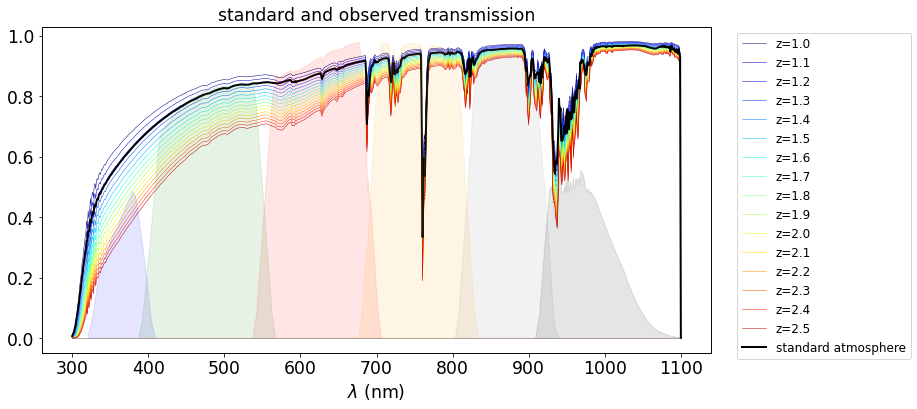

In [43]:
NOBS = len(all_df_obs)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NOBS), alpha=1)


fig, axs = plt.subplots(1,1,figsize=(12,6))

for index,obs in enumerate(all_df_obs):
    atm = obs["atm"].values
    am = all_am[index]
    label = f"z={am:.1f}"
    
    axs.plot(WL,atm,color=all_colors[index],label=label,lw=0.5)

    
    
axs.plot(WL,df_std["atm"].values,color="k",lw=2,label="standard atmosphere")
axs.legend(bbox_to_anchor=(1.03, 1.0))  
axs.set_xlabel("$\lambda$ (nm)")
axs.set_title("standard and observed transmission")


ax2 = axs.twinx()
for ifilt in range(NFILT):
    tag="tot_"+filter_tagnames[ifilt]
    #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
    ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
    ax2.set_yticks([])



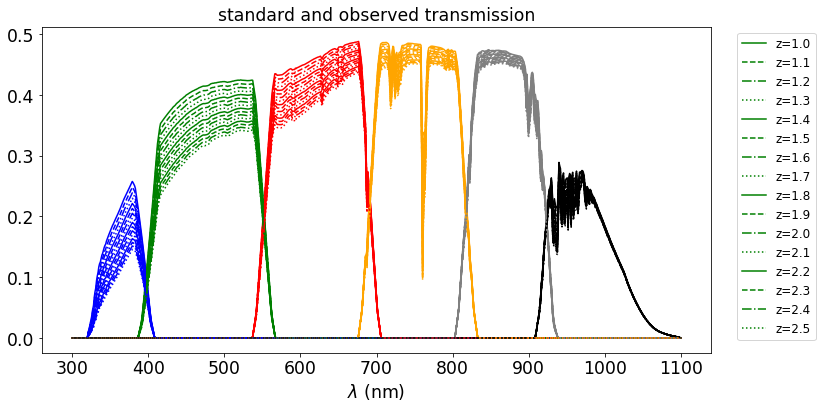

In [44]:
fig, axs = plt.subplots(1,1,figsize=(12,6))

all_linestyles = ['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':']


for idx_atm,the_obs in enumerate(all_df_obs):
    
    am = all_am[idx_atm]
    label = f"z={am:.1f}"
    
    for findex in range(NFILT):
        tag1="tot_"+filter_tagnames[findex]
        tag2="inst_"+filter_tagnames[findex]

        if findex==1:
            axs.plot(the_obs["wl"],the_obs[tag1],color=filter_color[findex],linestyle=all_linestyles[idx_atm],label=label )
        else:
            axs.plot(the_obs["wl"],the_obs[tag1],color=filter_color[findex],linestyle=all_linestyles[idx_atm])

axs.set_xlabel("$\lambda$ (nm)")
axs.set_title("standard and observed transmission")
axs.legend(bbox_to_anchor=(1.03, 1.0))  

In [45]:
all_df_obs[0].head()

wl       atm  tot_u  inst_u  tot_g  inst_g  tot_r  inst_r  tot_i  \
0  300.000000  0.008079    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
1  301.001252  0.013382    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
2  302.002503  0.020347    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
3  303.003755  0.033626    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
4  304.005006  0.040482    0.0     0.0    0.0     0.0    0.0     0.0    0.0   

   inst_i  tot_z  inst_z  tot_y  inst_y  
0     0.0    0.0     0.0    0.0     0.0  
1     0.0    0.0     0.0    0.0     0.0  
2     0.0    0.0     0.0    0.0     0.0  
3     0.0    0.0     0.0    0.0     0.0  
4     0.0    0.0     0.0    0.0     0.0

### Replace standard atmosphere with known atmosphere

In [46]:
if FLAG_REPLACE_STANDARD_ATMOS:
    df_std=all_df_obs[index_replace_atm]
    df_IIstd = CalculateIIntegrals(df_std,FILTERWL[:,2])

In [47]:
df_std.head()

wl       atm  tot_u  inst_u  tot_g  inst_g  tot_r  inst_r  tot_i  \
0  300.000000  0.003082    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
1  301.001252  0.005647    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
2  302.002503  0.009338    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
3  303.003755  0.017062    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
4  304.005006  0.021319    0.0     0.0    0.0     0.0    0.0     0.0    0.0   

   inst_i  tot_z  inst_z  tot_y  inst_y  
0     0.0    0.0     0.0    0.0     0.0  
1     0.0    0.0     0.0    0.0     0.0  
2     0.0    0.0     0.0    0.0     0.0  
3     0.0    0.0     0.0    0.0     0.0  
4     0.0    0.0     0.0    0.0     0.0

In [48]:
df_IIstd 

II0       II1         II2      II10         II20
0  0.033611  0.079827   12.693229  2.375001   377.645866
1  0.122330  0.297920  230.886856  2.435375  1887.409233
2  0.100765  0.113623  168.187941  1.127603  1669.108898
3  0.077961  0.024822  110.350060  0.318390  1415.459343
4  0.054154 -0.026793   50.706126 -0.494756   936.338975
5  0.026116  0.093622   32.709208  3.584867  1252.458616

# Integrals

## Calculate Integrals for observed atmosphere

In [49]:
all_df_IIobs = []
for idx,the_df_obs in enumerate(all_df_obs):
    the_df_IIobs = CalculateIIntegrals(the_df_obs,FILTERWL[:,2])
    all_df_IIobs.append(the_df_IIobs) 
    
    print(f"======== obs = {idx} =======")
    print(the_df_IIobs)

======== obs = 0 =======
        II0       II1         II2      II10         II20
0  0.036771  0.073289   13.933405  1.993132   378.925532
1  0.127134  0.258718  240.336363  2.034997  1890.411061
2  0.103093  0.096040  171.957848  0.931584  1667.981430
3  0.079028  0.020139  111.804072  0.254829  1414.744289
4  0.054712 -0.023959   51.435889 -0.437903   940.121434
5  0.026660  0.084633   33.142485  3.174550  1243.167313
======== obs = 1 =======
        II0       II1         II2      II10         II20
0  0.035154  0.076803   13.297240  2.184756   378.258685
1  0.124708  0.278780  235.559081  2.235468  1888.890672
2  0.101922  0.104923  170.060773  1.029447  1668.537415
3  0.078489  0.022480  111.072885  0.286404  1415.130615
4  0.054430 -0.025426   51.066929 -0.467131   938.204885
5  0.026382  0.089266   32.921734  3.383634  1247.897709
======== obs = 2 =======
        II0       II1         II2      II10         II20
0  0.033611  0.079827   12.693229  2.375001   377.645866
1  0.122330  

## Study of Integrals

In [50]:
df_IIstd 

II0       II1         II2      II10         II20
0  0.033611  0.079827   12.693229  2.375001   377.645866
1  0.122330  0.297920  230.886856  2.435375  1887.409233
2  0.100765  0.113623  168.187941  1.127603  1669.108898
3  0.077961  0.024822  110.350060  0.318390  1415.459343
4  0.054154 -0.026793   50.706126 -0.494756   936.338975
5  0.026116  0.093622   32.709208  3.584867  1252.458616

In [51]:
df_IIstd_2=df_IIstd.rename(index={0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'})

In [52]:
df_IIstd_2=df_IIstd_2.transpose()

In [53]:
df_IIstd_2

u            g            r            i           z  \
II0     0.033611     0.122330     0.100765     0.077961    0.054154   
II1     0.079827     0.297920     0.113623     0.024822   -0.026793   
II2    12.693229   230.886856   168.187941   110.350060   50.706126   
II10    2.375001     2.435375     1.127603     0.318390   -0.494756   
II20  377.645866  1887.409233  1669.108898  1415.459343  936.338975   

                y  
II0      0.026116  
II1      0.093622  
II2     32.709208  
II10     3.584867  
II20  1252.458616

<AxesSubplot:title={'center':'Integrals values'}>

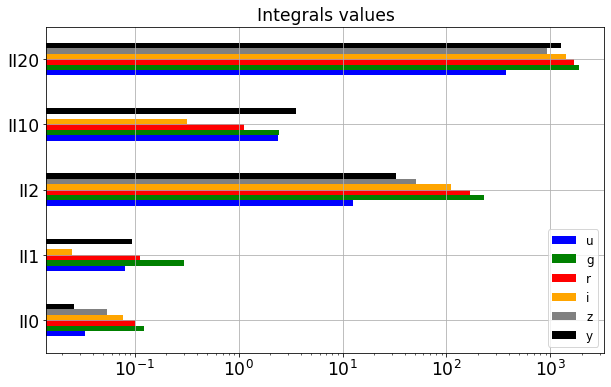

In [54]:
#my_colors = list(islice(cycle(['b', 'g', 'r', 'orange','grey','k']), None, len(df_IIstd_2)))
df_IIstd_2.plot.barh(log=True, figsize=(10,6),color=['b','g','r','orange','grey','k'],grid=True,title="Integrals values") 

## Calculate II differences

In [55]:
all_II_diff = []
for idx,z in enumerate(all_am):
    II_diff = all_df_IIobs[idx]-df_IIstd  
    all_II_diff.append(II_diff) 

In [56]:
all_II_div = []
for idx,z in enumerate(all_am):
    II_div = all_df_IIobs[idx]/df_IIstd  
    all_II_div.append(II_div) 

In [57]:
all_II_diff[15]

II0       II1        II2      II10       II20
0 -0.014684  0.009621  -5.610435  2.350727  -3.445980
1 -0.026882  0.177562 -52.245008  2.546186 -15.800005
2 -0.013825  0.096935 -22.336528  1.294281   8.508309
3 -0.006244  0.029453  -8.750347  0.438406   1.222123
4 -0.003266 -0.011228  -4.112934 -0.252395 -20.727953
5 -0.002721  0.040395  -2.268970  2.143632  48.697047

In [58]:
all_II_diff[7].iloc[5]["II0"]

-0.0011823889385389058

## Plot integral difference between observed and standard atmosphere

### 0th order integral

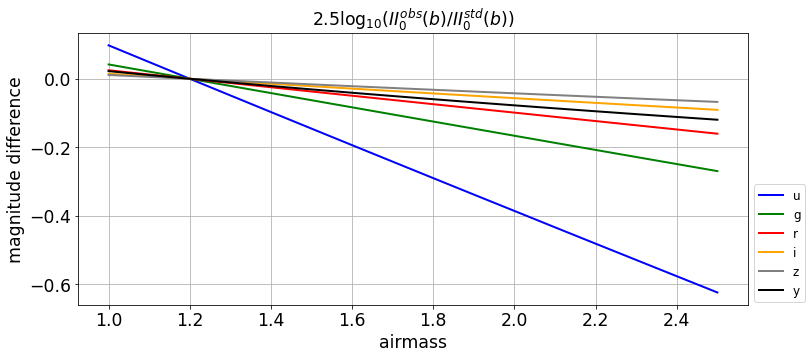

In [59]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
# loop on filters
for ifilt in range(NFILT): 
    the_div_mag = np.zeros(NAM)
    # loop on airmass to get the difference on II
    for idx,z in enumerate(all_am):
        the_div_mag[idx]= 2.5*np.log10(all_II_div[idx].iloc[ifilt]["II0"])
    ax.plot(all_am,the_div_mag,color=filter_color[ifilt],label=filter_tagnames[ifilt],lw=2)
ax.set_xlabel("airmass")
ax.set_ylabel("magnitude difference")
ax.set_title("$2.5 \log_{10} (II_0^{obs}(b)/II_0^{std}(b))$")
ax.legend(loc=(1.01, 0.01))
ax.grid()

- Magnitude corrections are of the order of 100 mmag, thus are huge. But what realu matters is the resolution on $\mathbb{I}_0^{obs}(b)$ 

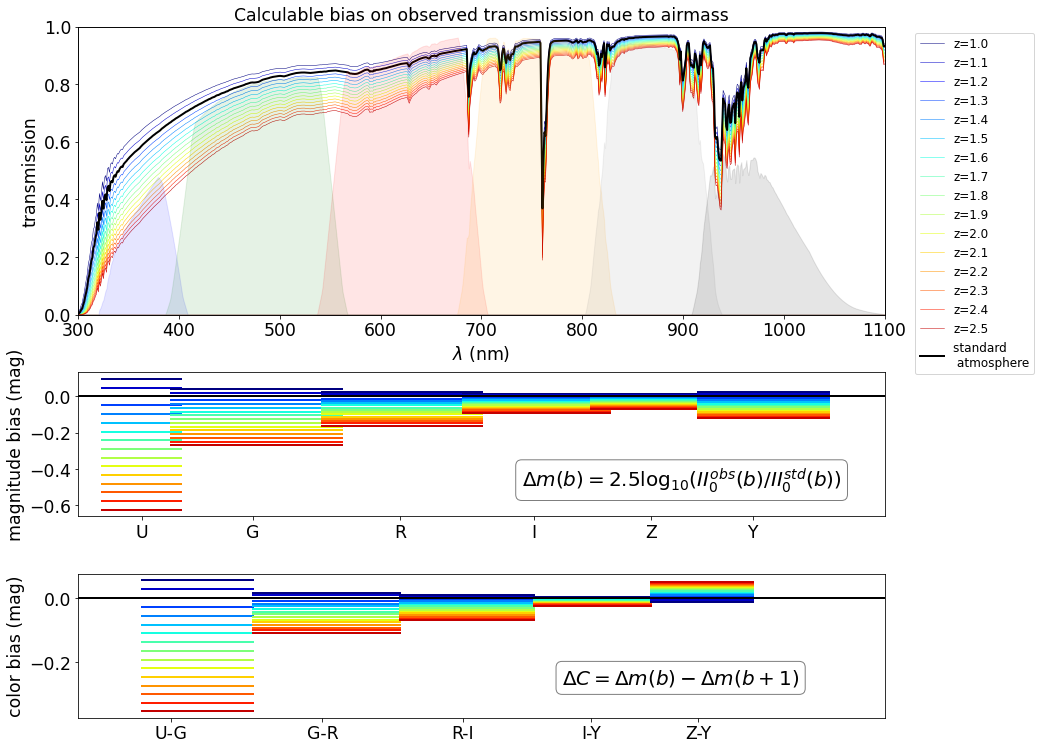

In [60]:
NOBS = len(all_df_obs)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NOBS), alpha=1)


fig = plt.figure(figsize=(14,12))

gs = fig.add_gridspec(3, 1,  height_ratios=(3, 1.5, 1.5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.3)

#top figure
axs = fig.add_subplot(gs[0, 0])

for index,obs in enumerate(all_df_obs):
    atm = obs["atm"].values
    am = all_am[index]
    label = f"z={am:.1f}"
    
    axs.plot(WL,atm,color=all_colors[index],label=label,lw=0.5)

    
    
axs.plot(WL,df_std["atm"].values,color="k",lw=2,label="standard \n atmosphere")
axs.legend(bbox_to_anchor=(1.03, 1.0))  
axs.set_xlabel("$\lambda$ (nm)")
axs.set_title("Calculable bias on observed transmission due to airmass")
axs.set_xlim(WLMIN,WLMAX)
axs.set_ylim(0,1)
axs.set_ylabel("transmission")


ax2 = axs.twinx()
for ifilt in range(NFILT):
    tag="tot_"+filter_tagnames[ifilt]
    #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
    ax2.fill_between(WL,df_std[tag].values,0,color=filter_color[ifilt],alpha=0.1) 
    ax2.set_yticks([])
ax2.set_ylim(0,0.5)

#middle figure
axs2 = fig.add_subplot(gs[1, 0])
for ifilt in range(NFILT): 
    the_div_mag = np.zeros(NAM)
    # loop on airmass to get the difference on II
    for idx,z in enumerate(all_am):
        the_div_mag[idx]= 2.5*np.log10(all_II_div[idx].iloc[ifilt]["II0"])
        xx= [FILTERWL[ifilt,0],FILTERWL[ifilt,1]]
        yy= [the_div_mag[idx],the_div_mag[idx]]
        axs2.plot(xx,yy,color=all_colors[idx],lw=2)
axs2.set_xlim(WLMIN,WLMAX)
axs2.axhline(y=0,lw=2,color="k")
#axs2.set_xlabel("$\lambda$ (nm)")
axs2.set_xticks(FILTERWL[:,2])
axs2.set_xticklabels(Filter_tagnames, minor=False)
axs2.set_ylabel("magnitude bias (mag)")
#axs2.grid()
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='w', alpha=0.5)

textstr="$\Delta m(b) = 2.5 \log_{10} (II_0^{obs}(b)/II_0^{std}(b))$"
#axs2.set_title(textstr)
# place a text box in upper left in axes coords
axs2.text(0.55, 0.35, textstr, transform=axs2.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)



# bottom figure
axs3 = fig.add_subplot(gs[2, 0])

for ifilt in range(NFILT-1): 
    the_div_mag = np.zeros(NAM)
    # loop on airmass to get the difference on II
    for idx,z in enumerate(all_am):
        dcolor = 2.5*np.log10(all_II_div[idx].iloc[ifilt]["II0"])- 2.5*np.log10(all_II_div[idx].iloc[ifilt+1]["II0"])
        xx= [FILTERWL[ifilt,2],FILTERWL[ifilt+1,2]]
        yy= [dcolor,dcolor]
        axs3.plot(xx,yy,color=all_colors[idx],lw=2)
axs3.set_xlim(WLMIN,WLMAX)
axs3.axhline(y=0,lw=2,color="k")
#axs3.set_xlabel("$\lambda$ (nm)")

axs3.set_xticks(FILTERWL[1:,0])
axs3.set_xticklabels(Filtercolor_tagnames, minor=False)

axs3.set_ylabel("color bias (mag)")
#axs3.grid()
textstr="$\Delta C = \Delta m(b) - \Delta m(b+1)$"
#axs2.set_title(textstr)
# place a text box in upper left in axes coords
axs3.text(0.60, 0.35, textstr, transform=axs3.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)


plt.tight_layout()    

### Normalized First order integral

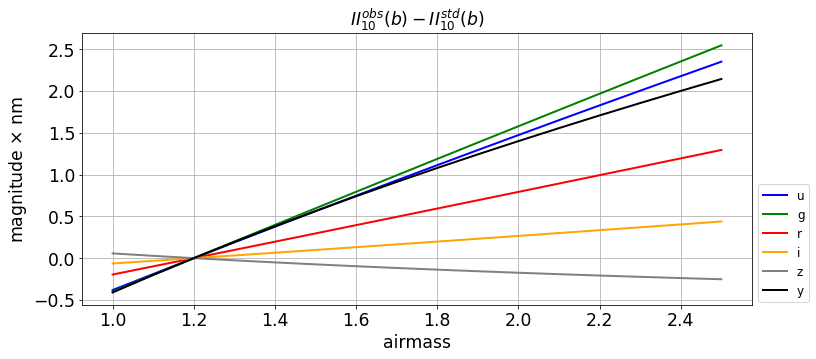

In [61]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
# loop on filters
for ifilt in range(NFILT): 
    the_diff = np.zeros(NAM)
    # loop on airmass to get the difference on II
    for idx,z in enumerate(all_am):
        the_diff[idx]=all_II_diff[idx].iloc[ifilt]["II10"]
    ax.plot(all_am,the_diff,color=filter_color[ifilt],label=filter_tagnames[ifilt],lw=2)
ax.set_xlabel("airmass")
ax.set_ylabel("magnitude $\\times$ nm")
ax.set_title("$II_{10}^{obs}(b)-II_{10}^{std}(b)$")
ax.legend(loc=(1.01, 0.01))
ax.grid()

- $\mathbb{I}_{10}^{obs}(b)-\mathbb{I}_{10}^{std}(b)$ in magnitude x nm
- It must be multiplied by $f^{\prime}(\lambda_b)$ in $nm^{-1}$

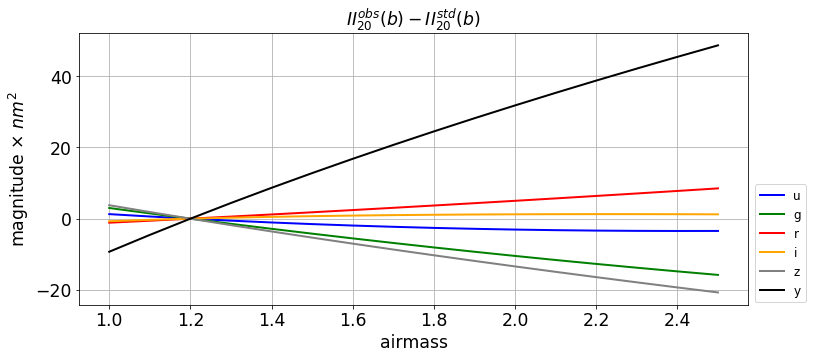

In [62]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
# loop on filters
for ifilt in range(NFILT): 
    the_diff = np.zeros(NAM)
    # loop on airmass to get the difference on II
    for idx,z in enumerate(all_am):
        the_diff[idx]=all_II_diff[idx].iloc[ifilt]["II20"]
    ax.plot(all_am,the_diff,color=filter_color[ifilt],label=filter_tagnames[ifilt],lw=2)
ax.set_xlabel("airmass")
ax.set_ylabel("magnitude $\\times \,\, nm^2$")
ax.set_title("$II_{20}^{obs}(b)-II_{20}^{std}(b)$")
ax.legend(loc=(1.01, 0.01))
ax.grid()

- $\mathbb{I}_{10}^{obs}(b)-\mathbb{I}_{10}^{std}(b)$ in magnitude x $nm^2$
- It must be multiplied by $f^{\prime\prime}(\lambda_b)$ in $nm^{-2}$

# SED

- Use SED sample from Lynne Jones
https://github.com/rhiannonlynne/photometry_sample

In [63]:
# this will contain attributes calculated for each SED
df_SED = pd.DataFrame(columns=["name","type"])

In [64]:
datadir = get_data_dir()
#sedDir = '/Users/lynnej/other_repos/photometry_sample'
sedDir = os.path.join(datadir,'photometry_sample')

sedtypes = ['galaxies','sn'] 
sedtypes_not_used = ['quasar','star', 'photoZ_outliers', 'white_dwarf']
sedtypes = sedtypes 

NSEDTYPES = len(sedtypes)

#dictionnary of SED-lambda à la runbin
seds = {}
#dictionnaru of SED fnu
sedsfnu = {}
#dictionnaru of sedtypes
sedtypeslists = {}

#counter on sed
count_sed =0

# loop on SED type
for idx,s in enumerate(sedtypes):
    sedtypelist = []
    # loop on object sed in SED type list
    filenames = os.listdir(os.path.join(sedDir, s))
    for f in filenames:
        name = f.replace('.dat', '').replace('.sed', '')
        
        if name == "m3.0Full":
            continue
        #if name == 'Sa_template_norm':
        #    continue
        
        if name == 'Sdm_template_norm0':
            continue
        
        #if name == 'Ell2_template_norm':
        #    continue
        
        
        if name == 'sn1a_15.0':
            continue
        
        # create an SED object in the dictionnary with the name of thtat sed
        seds[name] = Sed()
        seds[name].readSED_flambda(os.path.join(sedDir, s, f))
        sedsfnu[name]= Sed()
    
        # save the name of the sed in the list
        sedtypelist.append(name) 
        
        #save in pandas dataframe
        df_SED.loc[count_sed] = [name,s]
        count_sed+=1
        
    # save the above list in a dictionary
    sedtypeslists[s] =  sedtypelist
        

In [65]:
df_SED=df_SED.set_index('name')
df_SED

type
name                        
Sa_template_norm    galaxies
Ell2_template_norm  galaxies
sn1a_10.0                 sn
sn1a_20.0                 sn

In [66]:
seds

{'Sa_template_norm': <rubin_sim.photUtils.Sed.Sed at 0x7fadbcee3820>,
 'Ell2_template_norm': <rubin_sim.photUtils.Sed.Sed at 0x7fadba013cd0>,
 'sn1a_10.0': <rubin_sim.photUtils.Sed.Sed at 0x7fadbced4310>,
 'sn1a_20.0': <rubin_sim.photUtils.Sed.Sed at 0x7fadbcec6a30>}

### Define redshifts

In [67]:
all_redshifts = np.arange(0,3.5,0.5)
len(all_redshifts)

7

In [68]:
redshift_color = ["k","b","g","r","magenta","orange","yellow","grey"]
redshift_linestyle = ["-","-.",":","-","-.",":","-","-.",":"]

In [69]:
all_redshifts_tags = []
for z in all_redshifts:
    z10=int(z*10)
    z_tag= f"_{z10:02}"
    all_redshifts_tags.append(z_tag)
print(all_redshifts_tags)
print(all_redshifts)
      

['_00', '_05', '_10', '_15', '_20', '_25', '_30']
[0.  0.5 1.  1.5 2.  2.5 3. ]


# Make a new SED sample with redshifts

In [70]:
# this will contain attributes calculated for each SED
df_SED_redshifts = pd.DataFrame(columns=["name","type","name0","idx0","redshift","rscol"])
df_SED_redshifts = df_SED_redshifts.astype( dtype={'name' : str, 'type': str,"name0":str,"idx0":int,'redshift': float,"rscol":str})

In [71]:
count_sed_z = 0

for idx_s,n_s in enumerate(seds):
    the_sed_type = df_SED.iloc[idx_s]["type"]
    for idx_z,z in enumerate(all_redshifts):
     
        #new name of SED
        the_sed_n = n_s+all_redshifts_tags[idx_z]
        
        rscol=redshift_color[idx_z] 
       
        # fill the pandas dataframe
        df_SED_redshifts.loc[count_sed_z] = [the_sed_n,the_sed_type,n_s,idx_s,z,rscol]
        
        # index for pandas dataframe
        count_sed_z+=1
        

In [72]:
df_SED_redshifts=df_SED_redshifts.set_index('name')
df_SED_redshifts

type               name0  idx0  redshift    rscol
name                                                                        
Sa_template_norm_00    galaxies    Sa_template_norm     0       0.0        k
Sa_template_norm_05    galaxies    Sa_template_norm     0       0.5        b
Sa_template_norm_10    galaxies    Sa_template_norm     0       1.0        g
Sa_template_norm_15    galaxies    Sa_template_norm     0       1.5        r
Sa_template_norm_20    galaxies    Sa_template_norm     0       2.0  magenta
Sa_template_norm_25    galaxies    Sa_template_norm     0       2.5   orange
Sa_template_norm_30    galaxies    Sa_template_norm     0       3.0   yellow
Ell2_template_norm_00  galaxies  Ell2_template_norm     1       0.0        k
Ell2_template_norm_05  galaxies  Ell2_template_norm     1       0.5        b
Ell2_template_norm_10  galaxies  Ell2_template_norm     1       1.0        g
Ell2_template_norm_15  galaxies  Ell2_template_norm     1       1.5        r
Ell2_template_norm_20  galaxies  Ell2_template_norm     1       2.0  magenta
Ell2_template_norm_25  galaxies  Ell2_template_norm     1       2.5   orange
Ell2_template_norm_30  galaxies  Ell2_template_norm     1       3.0   yellow
sn1a_10.0_00                 sn           sn1a_10.0     2       0.0        k
sn1a_10.0_05                 sn           sn1a_10.0     2       0.5        b
sn1a_10.0_10                 sn           sn1a_10.0     2       1.0        g
sn1a_10.0_15                 sn           sn1a_10.0     2       1.5        r
sn1a_10.0_20                 sn           sn1a_10.0     2       2.0  magenta
sn1a_10.0_25                 sn           sn1a_10.0     2       2.5   orange
sn1a_10.0_30                 sn           sn1a_10.0     2       3.0   yellow
sn1a_20.0_00                 sn           sn1a_20.0     3       0.0        k
sn1a_20.0_05                 sn           sn1a_20.0     3       0.5        b
sn1a_20.0_10                 sn           sn1a_20.0     3       1.0        g
sn1a_20.0_15                 sn           sn1a_20.0     3       1.5        r
sn1a_20.0_20                 sn           sn1a_20.0     3       2.0  magenta
sn1a_20.0_25                 sn           sn1a_20.0     3       2.5   orange
sn1a_20.0_30                 sn           sn1a_20.0     3       3.0   yellow

In [73]:
#list(seds.keys())

In [74]:
#sedtypeslists

In [75]:
NSED = len(df_SED_redshifts)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

In [76]:
# Redshift the quasar. Note repeat calls to this cell will stack, increasing the redshift multiple times.
#z=1.5
#seds['quasar'].redshiftSED(z)

In [77]:
#plt.plot(seds['quasar'].wavelen,seds['quasar'].flambda)
#plt.xlim(WLMIN,WLMAX)

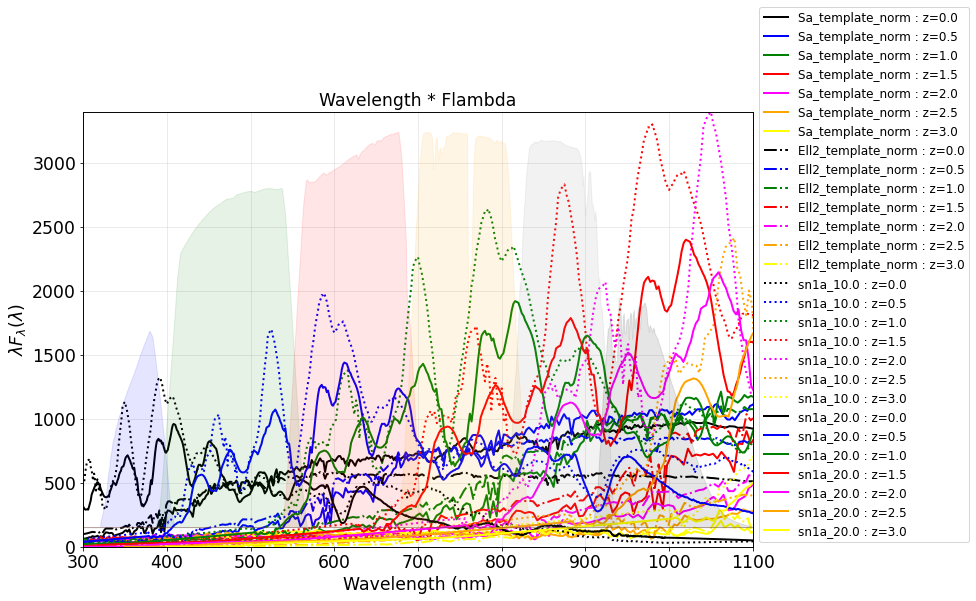

In [79]:
# Plot the seds
fig, ax = plt.subplots(1,1,figsize=(12,8))

sedmax=0
# loop on SED
#for idx,n in enumerate(seds):
idx=0
for sed_name, row in df_SED_redshifts.iterrows():
   
    name0 = row["name0"]
    idx0 = row["idx0"]     # index of original SED
    redshift = row["redshift"]
    rs_col = row["rscol"]  # color of redshifted line
    
    rs_linestyle= redshift_linestyle[idx0]
    
    the_sed_z = Sed()
    the_sed_z = copy.deepcopy(seds[name0])
    #ax.plot(the_sed_z.wavelen, the_sed_z.flambda * the_sed_z.wavelen,'k')
    
    the_sed_z.redshiftSED(redshift)
    the_label=f"{name0} : z={redshift:.1f}"
    
    ax.plot(the_sed_z.wavelen, the_sed_z.flambda * the_sed_z.wavelen, color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
    
    fl = the_sed_z.flambda * the_sed_z.wavelen
    wav= the_sed_z.wavelen
    
    fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
    
    if(len(fl)>0):
        sedmax=max(sedmax,fl.max()) 
        
    idx+=1
    
    
ax.legend(loc=(1.01, 0.01))
ax.set_xlim(WLMIN, WLMAX)
ax.set_ylim(0, sedmax)
ax.grid(alpha=0.3)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\lambda F_\lambda(\lambda)$")
ax.set_title("Wavelength * Flambda")

ax2 = ax.twinx()
for ifilt in range(NFILT):
    tag="tot_"+filter_tagnames[ifilt]
    #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
    ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
    ax2.set_yticks([])

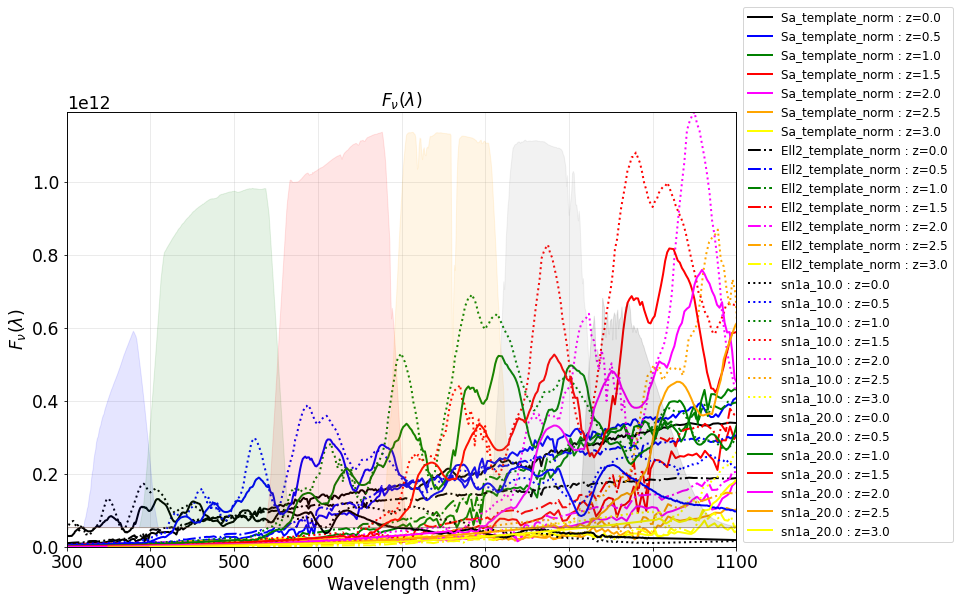

In [80]:
# Plot the seds
fig, ax = plt.subplots(1,1,figsize=(12,8))

# loop on SED
sedmax=0

idx=0
for sed_name, row in df_SED_redshifts.iterrows():
    

    
    name0 = row["name0"]
    idx0 = row["idx0"]     # index of original SED
    redshift = row["redshift"]
    rs_col = row["rscol"]  # color of redshifted line
    
    rs_linestyle= redshift_linestyle[idx0]
    
    the_sed_z = Sed()
    the_sed_z = copy.deepcopy(seds[name0])
    #ax.plot(the_sed_z.wavelen, the_sed_z.flambda * the_sed_z.wavelen,'k')
    
    the_sed_z.redshiftSED(redshift)
    the_label=f"{name0} : z={redshift:.1f}"
    
    wavel,fnu = the_sed_z.getSED_fnu()
    #ax.plot(wavel, fnu, color=all_colors[idx],label=the_label,lw=2)
    ax.plot(wavel, fnu, color=rs_col,linestyle=rs_linestyle,label=the_label,lw=2)
    
    
    fl = fnu
    wav= wavel
    fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
    
    if(len(fl)>0):
        sedmax=max(sedmax,fl.max()) 
        
    idx+=1
    
ax.legend(loc=(1.01, 0.01))
ax.set_xlim(WLMIN, WLMAX)
ax.set_ylim(0, sedmax)

ax.grid(alpha=0.3)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$F_\\nu (\lambda)$")
ax.set_title("$F_\\nu (\lambda)$")

ax2 = ax.twinx()
for ifilt in range(NFILT):
    tag="tot_"+filter_tagnames[ifilt]
    #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
    ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
    ax2.set_yticks([])

# Plot one plot per SED type

Text(0.5, 1.0, 'SED $\\lambda F_\\lambda$')

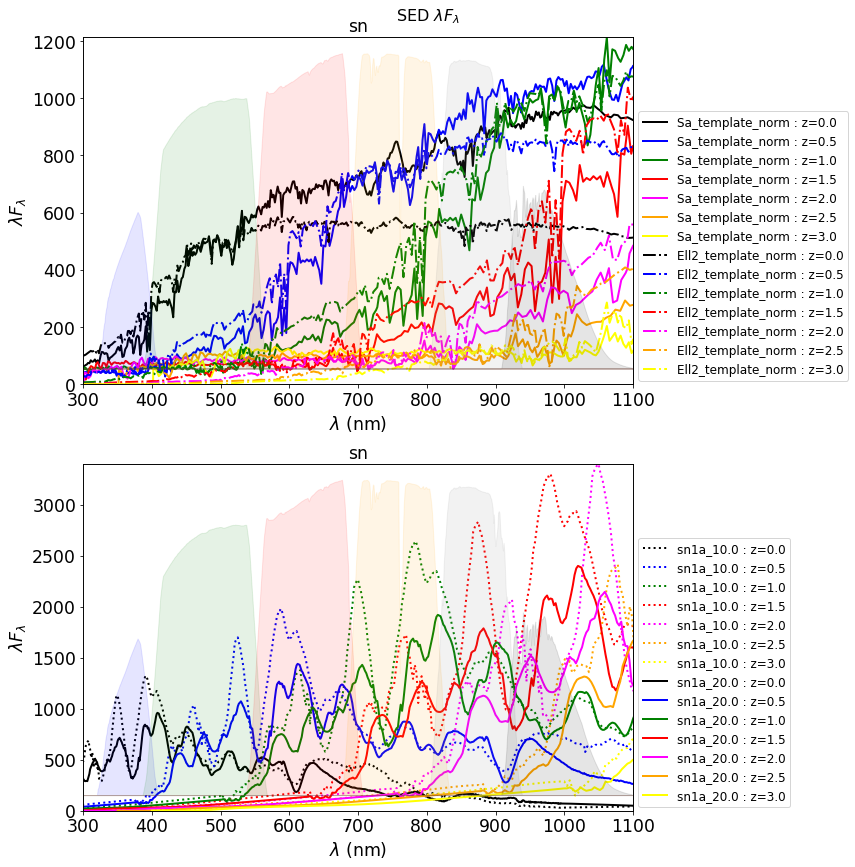

In [81]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))


# loop on all SED types
for idx,sed_t in enumerate(sedtypes):

    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
    
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
    
    
    sedmax=0
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
   
        
        ax.plot(the_sed_z.wavelen, the_sed_z.flambda * the_sed_z.wavelen, color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
    
        fl = the_sed_z.flambda * the_sed_z.wavelen
        wav= the_sed_z.wavelen
    
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
    
        if(len(fl)>0):
            sedmax=max(sedmax,fl.max()) 
   
    
    ax.set_ylim(0,sedmax)
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$\lambda F_\lambda$")
    
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
    
plt.tight_layout()
plt.suptitle("SED $\\lambda F_\\lambda$",fontsize=16,y=1.0)

Text(0.5, 1.01, 'SED $F_\\nu$')

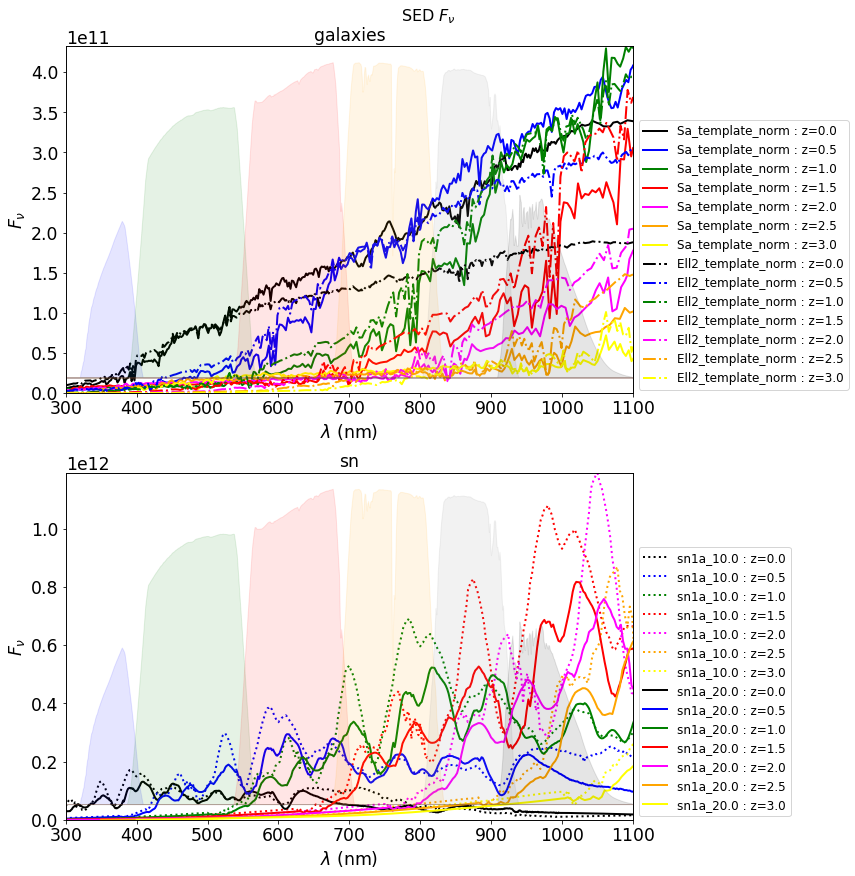

In [95]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))


# loop on all SED types
for idx,sed_t in enumerate(sedtypes):

    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]

    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
   
    
    
    sedmax=0
    for sed_name, row in df_SED_redshifts_sel.iterrows():
        
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
    
        wavel,fnu = the_sed_z.getSED_fnu()
        
        ax.plot(wavel, fnu , color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        #compute SED max
        fl = fnu
        wav= wavel
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
        sedmax=max(sedmax,fl.max()) 
        
    ax.set_ylim(0,sedmax)
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$F_\\nu$")
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
    
plt.tight_layout()
plt.suptitle("SED $F_\\nu$",fontsize=16,y=1.01)

Text(0.5, 1.01, 'SED $f^\\prime_\\nu$')

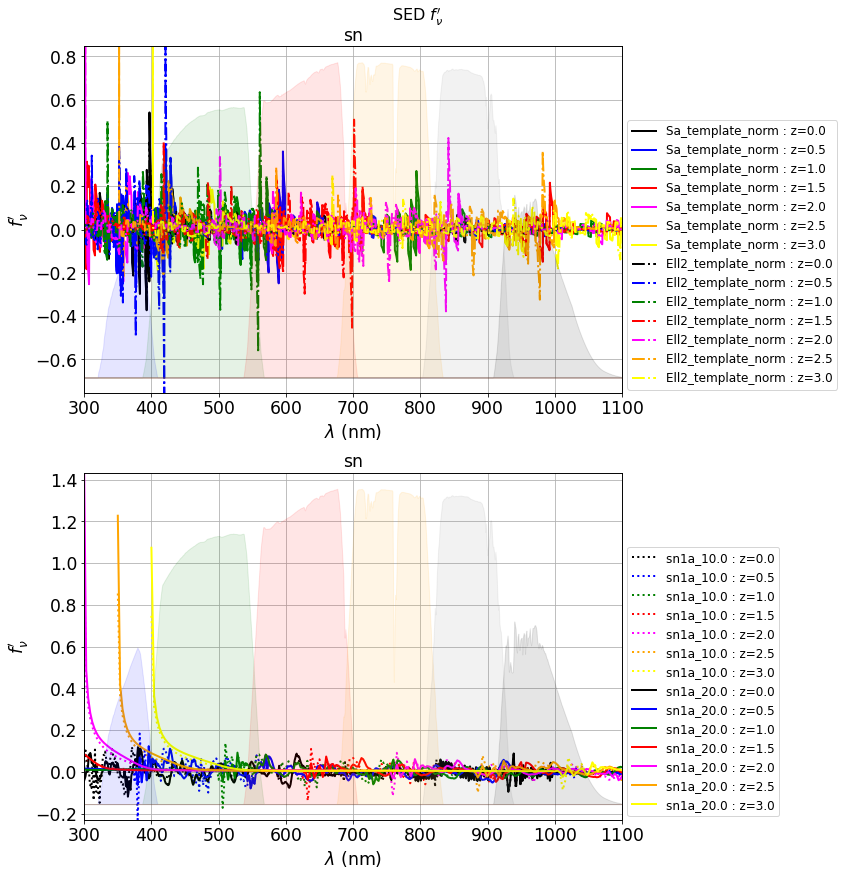

In [96]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))


# loop on SED types
for idx,sed_t in enumerate(sedtypes):
    
    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
            
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
       
    sedmax=0
    sedmin=0
    
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
        
        wavel,fnu = the_sed_z.getSED_fnu()
    
        x=wavel
        y = fnu
        fnup=np.gradient(y, x)
        fratio = fnup/fnu
        ax.plot(wavel, fratio , color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        
        #compute SED max
        fl = fratio
        wav= wavel
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
        sedmax=max(sedmax,fl.max()) 
        sedmin=min(sedmin,fl.min()) 
        
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(s)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_ylim(sedmin,sedmax)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$f^\prime_\\nu$")
    ax.grid()
    
    ax2 = axs[idx].twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
plt.tight_layout()
plt.suptitle("SED $f^\prime_\\nu$",fontsize=16,y=1.01)

Text(0.5, 1.01, 'SED $f^{\\prime\\prime}_\\nu$')

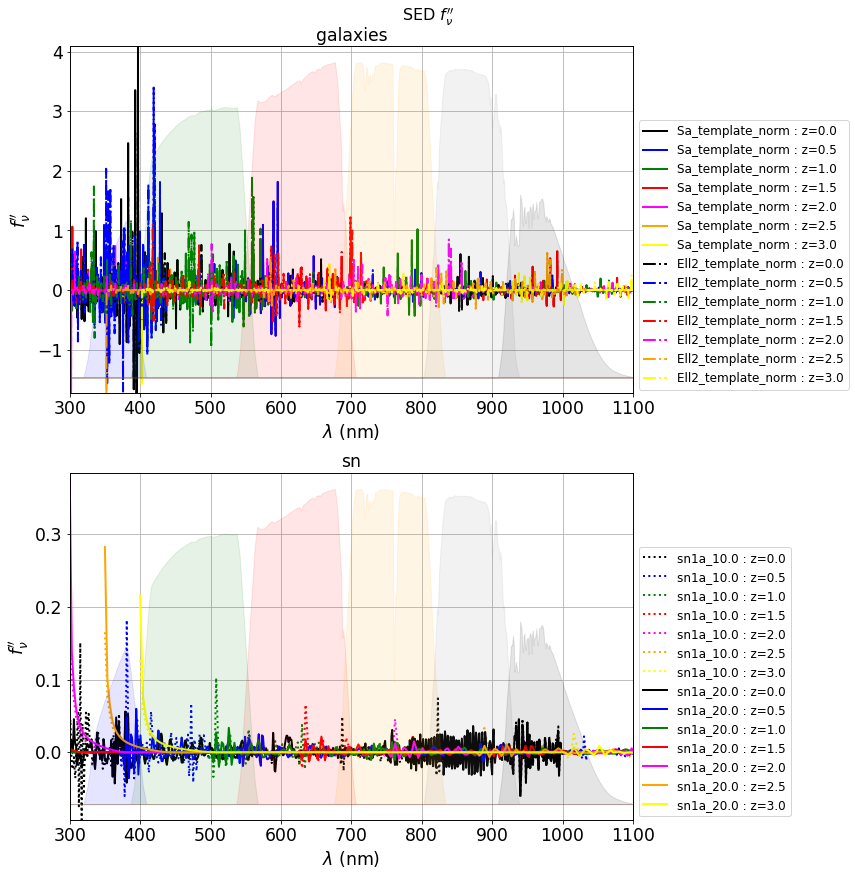

In [100]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))

for idx,sed_t in enumerate(sedtypes):
    
    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
       
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
    
    #loop on objects in sed type list
    sedmin=0
    sedmax=0
    
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
        
        wavel,fnu = the_sed_z.getSED_fnu()

        x=wavel
        y = fnu
        fnup=np.gradient(y, x)
        fnupp = np.gradient(fnup,x)
        fratio = fnupp/fnu
        ax.plot(wavel, fratio , color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        
        #compute SED max
        fl = fratio
        wav= wavel
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
        sedmax=max(sedmax,fl.max()) 
        sedmin=min(sedmin,fl.min()) 
        
        
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_ylim(sedmin,sedmax)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$f^{\prime\prime}_\\nu$")
    ax.grid()
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
plt.tight_layout()
plt.suptitle("SED $f^{\prime\prime}_\\nu$",fontsize=16,y=1.01)

# Filtering the SED

In [86]:
def smooth_data_convolve_my_average(arr, span):
    re = np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

    # The "my_average" part: shrinks the averaging window on the side that 
    # reaches beyond the data, keeps the other side the same size as given 
    # by "span"
    re[0] = np.average(arr[:span])
    for i in range(1, span + 1):
        re[i] = np.average(arr[:i + span])
        re[-i] = np.average(arr[-i - span:])
    return re

def smooth_data_np_average(arr, span):  # my original, naive approach
    return [np.average(arr[val - span:val + span + 1]) for val in range(len(arr))]

def smooth_data_np_convolve(arr, span):
    return np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

def smooth_data_np_cumsum_my_average(arr, span):
    cumsum_vec = np.cumsum(arr)
    moving_average = (cumsum_vec[2 * span:] - cumsum_vec[:-2 * span]) / (2 * span)

    # The "my_average" part again. Slightly different to before, because the
    # moving average from cumsum is shorter than the input and needs to be padded
    front, back = [np.average(arr[:span])], []
    for i in range(1, span):
        front.append(np.average(arr[:i + span]))
        back.insert(0, np.average(arr[-i - span:]))
    back.insert(0, np.average(arr[-2 * span:]))
    return np.concatenate((front, moving_average, back))

def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))
    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)

def smooth_data_kernel_regression(arr, span):
    # "span" smoothing parameter is ignored. If you know how to 
    # incorporate that with kernel regression, please comment below.
    kr = KernelReg(arr, np.linspace(0, 1, len(arr)), 'c')
    return kr.fit()[0]

def smooth_data_savgol_0(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 0)

def smooth_data_savgol_1(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 1)

def smooth_data_savgol_2(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 2)

def smooth_data_fft(arr, span):  # the scaling of "span" is open to suggestions
    w = fftpack.rfft(arr)
    spectrum = w ** 2
    cutoff_idx = spectrum < (spectrum.max() * (1 - np.exp(-span / 2000)))
    w[cutoff_idx] = 0
    return fftpack.irfft(w)


In [87]:
# filtering width in nm
span=150

Text(0.5, 1.01, 'Filtered SED $F_\\nu$')

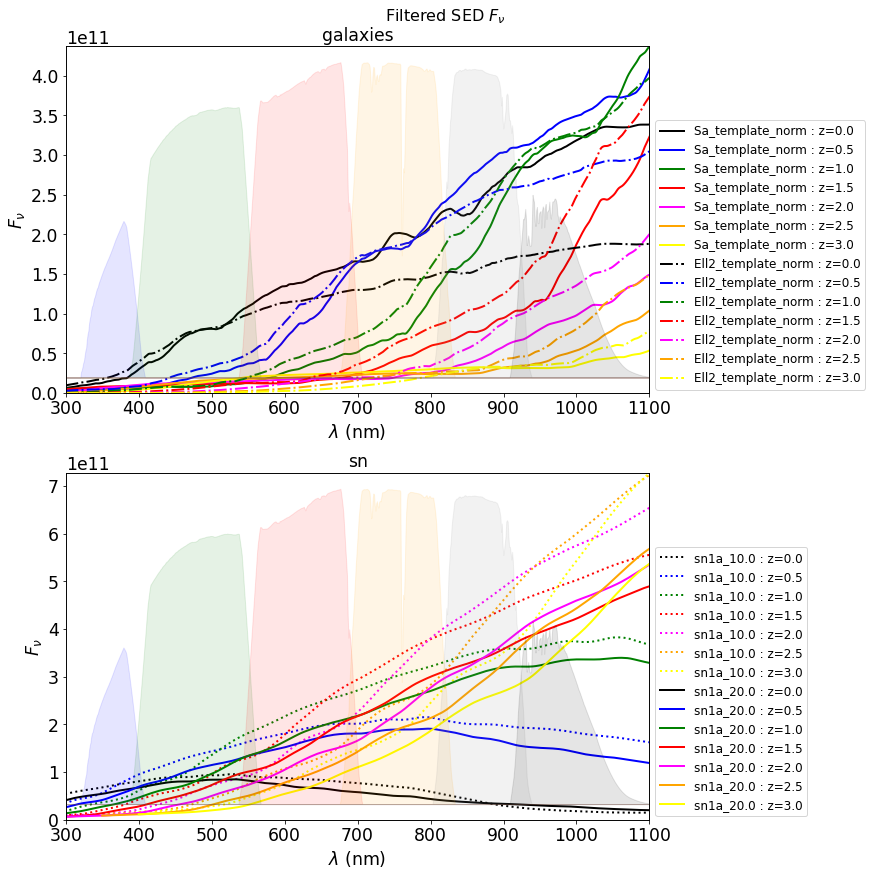

In [101]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))

for idx,sed_t in enumerate(sedtypes):
    
    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
     
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
    
    sedmin=0
    sedmax=0
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
        
        wavel,fnu = the_sed_z.getSED_fnu()
        
        fnu_filtered = smooth_data_np_convolve(fnu, span)
        
        ax.plot(wavel, fnu_filtered , color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        
        #compute SED max
        fl = fnu_filtered
        wav= wavel
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
        sedmax=max(sedmax,fl.max()) 
        sedmin=min(sedmin,fl.min()) 
        
        
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_ylim(0,sedmax)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$F_\\nu$")
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
    
plt.tight_layout()
plt.suptitle("Filtered SED $F_\\nu$",fontsize=16,y=1.01)

Text(0.5, 1.01, 'Filtered SED $f^\\prime_\\nu$')

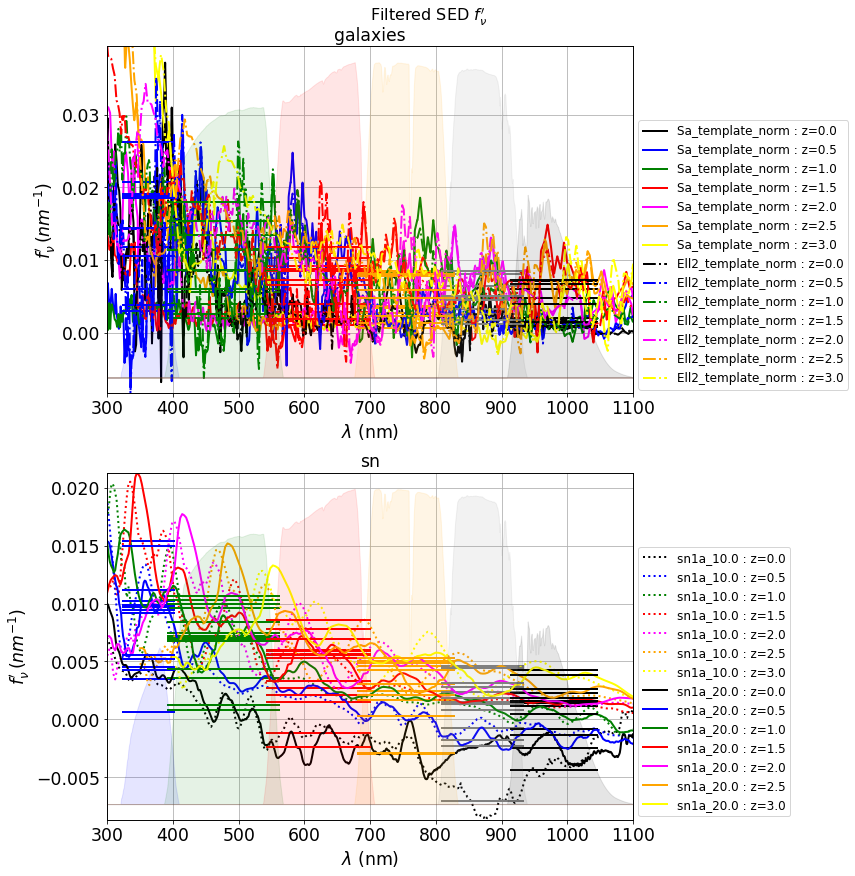

In [140]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))

df_fp = pd.DataFrame(columns=["fp_u","fp_g","fp_r","fp_i","fp_z","fp_y"])

for idx,sed_t in enumerate(sedtypes):
    
    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
     
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
    
   
    sedmin=0
    sedmax=0    
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
        
        wavel,fnu = the_sed_z.getSED_fnu()
    
        fnu_filtered = smooth_data_np_convolve(fnu, span)
        x=wavel
        y = fnu_filtered
        fnup=np.gradient(y, x)
        fratio = fnup/fnu_filtered
        ax.plot(wavel, fratio ,  color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        
        #compute SED max
        fl = fratio
        wav= wavel
        
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
        
        
        flmax=fl.max()
        flmin=fl.min()
        
        if redshift<=2:
            if not np.isnan(flmax):
                sedmax=max(sedmax,fl.max()) 
            if not np.isnan(flmin):
                sedmin=min(sedmin,fl.min()) 
        
        
        # average fp
        fp_filters = ComputeAverage(x,fratio,df_std)
        for ifilt in range(NFILT):
            ax.plot([FILTERWL[ifilt,0],FILTERWL[ifilt,1]],[fp_filters[ifilt],fp_filters[ifilt]],color=filter_color[ifilt],lw=2)
        df_fp.loc[sed_name] = fp_filters     
        
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_ylim(sedmin,sedmax)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$f^\prime_\\nu \, (nm^{-1})$")
    ax.grid()
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
plt.tight_layout()
plt.suptitle("Filtered SED $f^\prime_\\nu$",fontsize=16,y=1.01)

In [141]:
df_fp

fp_u      fp_g      fp_r      fp_i      fp_z  \
Sa_template_norm_00    0.014306  0.008547  0.002844  0.002644  0.002086   
Sa_template_norm_05    0.006050  0.011490  0.010314  0.003359  0.002571   
Sa_template_norm_10    0.002992  0.003958  0.009223  0.008307  0.006385   
Sa_template_norm_15    0.003857  0.002039  0.003957  0.008465  0.004743   
Sa_template_norm_20    0.011809  0.002546  0.001050  0.003630  0.008105   
Sa_template_norm_25    0.020764  0.005568  0.001645  0.000595  0.003275   
Sa_template_norm_30         NaN       NaN       NaN       NaN       NaN   
Ell2_template_norm_00  0.014341  0.006005  0.001870  0.001269  0.001198   
Ell2_template_norm_05  0.010556  0.011384  0.008488  0.002260  0.001681   
Ell2_template_norm_10  0.019142  0.008625  0.008770  0.007744  0.004535   
Ell2_template_norm_15  0.018821  0.013412  0.006614  0.008081  0.004565   
Ell2_template_norm_20  0.026272  0.015352  0.007281  0.005826  0.008467   
Ell2_template_norm_25  0.018549  0.017946  0.011861  0.004716  0.005013   
Ell2_template_norm_30       NaN       NaN       NaN       NaN       NaN   
sn1a_10.0_00           0.003489  0.000853 -0.001154 -0.002956 -0.007077   
sn1a_10.0_05           0.010247  0.003606  0.001487  0.000313 -0.000722   
sn1a_10.0_10           0.009723  0.007183  0.002727  0.001705  0.000813   
sn1a_10.0_15           0.015417  0.007469  0.005641  0.002447  0.001537   
sn1a_10.0_20           0.009896  0.009616  0.005956  0.005003  0.002336   
sn1a_10.0_25           0.004522  0.010313  0.005906  0.004619  0.004639   
sn1a_10.0_30           0.000612  0.007046  0.007838  0.005082  0.003176   
sn1a_20.0_00           0.004263  0.001236 -0.002352 -0.002939 -0.002311   
sn1a_20.0_05           0.009423  0.004382  0.002139  0.000300 -0.001739   
sn1a_20.0_10           0.011165  0.006937  0.003339  0.002146  0.001344   
sn1a_20.0_15           0.015003  0.008441  0.005278  0.003032  0.001806   
sn1a_20.0_20           0.009155  0.010686  0.005557  0.004833  0.002788   
sn1a_20.0_25           0.005536  0.009983  0.006952  0.004222  0.004433   
sn1a_20.0_30           0.005228  0.006774  0.008555  0.005314  0.003178   

                           fp_y  
Sa_template_norm_00    0.001366  
Sa_template_norm_05    0.001451  
Sa_template_norm_10    0.002005  
Sa_template_norm_15    0.007063  
Sa_template_norm_20    0.004737  
Sa_template_norm_25    0.006045  
Sa_template_norm_30         NaN  
Ell2_template_norm_00  0.000734  
Ell2_template_norm_05  0.000929  
Ell2_template_norm_10  0.001492  
Ell2_template_norm_15  0.006651  
Ell2_template_norm_20  0.003963  
Ell2_template_norm_25  0.007237  
Ell2_template_norm_30       NaN  
sn1a_10.0_00          -0.004323  
sn1a_10.0_05          -0.000812  
sn1a_10.0_10           0.000480  
sn1a_10.0_15           0.001197  
sn1a_10.0_20           0.001452  
sn1a_10.0_25           0.002317  
sn1a_10.0_30           0.004295  
sn1a_20.0_00          -0.002476  
sn1a_20.0_05          -0.001328  
sn1a_20.0_10           0.000461  
sn1a_20.0_15           0.001552  
sn1a_20.0_20           0.001829  
sn1a_20.0_25           0.002651  
sn1a_20.0_30           0.003813

In [142]:
df_fp.describe()

fp_u       fp_g       fp_r       fp_i       fp_z       fp_y
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000
mean    0.010813   0.007746   0.005069   0.003462   0.002570   0.002107
std     0.006433   0.004240   0.003561   0.003039   0.003244   0.002827
min     0.000612   0.000853  -0.002352  -0.002956  -0.007077  -0.004323
25%     0.005305   0.004678   0.002286   0.001816   0.001392   0.000783
50%     0.010071   0.007326   0.005599   0.003495   0.002680   0.001522
75%     0.014837   0.010230   0.007699   0.005062   0.004557   0.003925
max     0.026272   0.017946   0.011861   0.008465   0.008467   0.007237

<AxesSubplot:title={'center':'$f_\\nu^{\\prime}$'}, ylabel='$f^{\\prime}_\\nu \\quad (nm^{-1})$'>

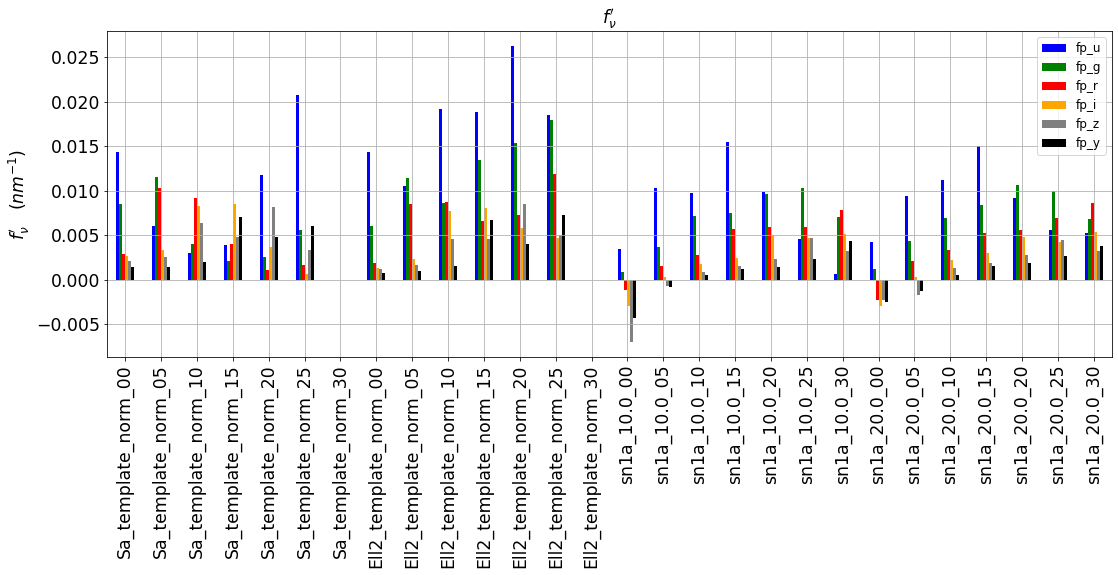

In [143]:
my_colors = list(islice(cycle(['b', 'g', 'r', 'orange','grey','k']), None, len(df_fp)))
df_fp.plot.bar(figsize=(18,6),ylabel="$f^{\prime}_\\nu \quad (nm^{-1})$",grid=True,color=my_colors,title="$f_\\nu^{\prime}$")

Text(0.5, 1.01, 'Filtered SED $f^{\\prime\\prime}_\\nu$')

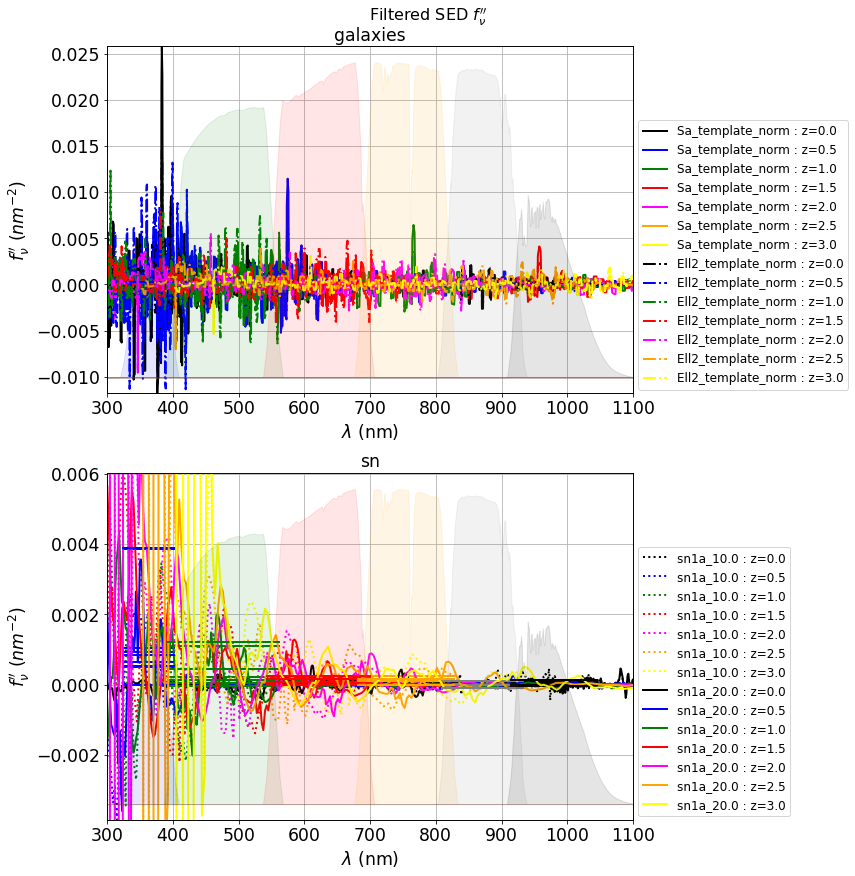

In [145]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(12,NSEDTYPES*6))

df_fpp = pd.DataFrame(columns=["fpp_u","fpp_g","fpp_r","fpp_i","fpp_z","fpp_y"])

# loop on sedtypes
for idx,sed_t in enumerate(sedtypes):
    
    
    if NSEDTYPES==1:
        ax=axs
    else:
        ax=axs[idx]
     
    cut = df_SED_redshifts["type"] == sed_t
    df_SED_redshifts_sel = df_SED_redshifts[cut]
    
 
    
    #loop on object in sedypes
    sedmax=0
    sedmin=0
    
    for sed_name, row in df_SED_redshifts_sel.iterrows():
   
        name0 = row["name0"]
        idx0 = row["idx0"]     # index of original SED
        redshift = row["redshift"]
        rs_col = row["rscol"]  # color of redshifted line
        rs_linestyle= redshift_linestyle[idx0]
    
    
        the_sed_z = Sed()
        the_sed_z = copy.deepcopy(seds[name0])
        the_sed_z.redshiftSED(redshift)
        the_label=f"{name0} : z={redshift:.1f}"
        
        wavel,fnu = the_sed_z.getSED_fnu()
    
        fnu_filtered = smooth_data_np_convolve(fnu, span)
        x=wavel
        y = fnu_filtered
        fnup=np.gradient(y, x)
        fnupp = np.gradient(fnup,x)
        fratio = fnupp/fnu
        ax.plot(wavel, fratio , color=rs_col, linestyle=rs_linestyle,label=the_label,lw=2)
        
        #compute SED max
        fl = fratio
        wav= wavel
        fl = fl[np.where(np.logical_and(wav>=WLMIN,wav<=WLMAX))[0]]
      
        #fl=np.nan_to_num(fl, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
        
        flmax=fl.max()
        flmin=fl.min()
        
        if redshift <2:
            if not np.isnan(flmax) and np.isfinite(flmax):
                sedmax=max(sedmax,fl.max()) 
            if not np.isnan(flmin) and np.isfinite(flmin):
                sedmin=min(sedmin,fl.min()) 
           
        
        # average fpp
        fpp_filters = ComputeAverage(x,fratio,df_std)
        for ifilt in range(NFILT):
            ax.plot([FILTERWL[ifilt,0],FILTERWL[ifilt,1]],[fpp_filters[ifilt],fpp_filters[ifilt]],color=filter_color[ifilt],lw=2)
        df_fpp.loc[sed_name] = fpp_filters   
        
        
    ax.legend(loc=(1.01, 0.01))
    ax.set_title(sed_t)
    ax.set_xlim(WLMIN,WLMAX)
    ax.set_ylim(sedmin,sedmax)
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel("$f^{\prime\prime}_\\nu \,\, (nm^{-2})$")
    ax.grid()
    
    ax2 = ax.twinx()
    for ifilt in range(NFILT):
        tag="tot_"+filter_tagnames[ifilt]
        #ax2.plot(WL,df_std[tag].values,color=filter_color[ifilt]) 
        ax2.fill_between(WL,df_std[tag].values,color=filter_color[ifilt],alpha=0.1) 
        ax2.set_yticks([])
    
plt.tight_layout()
plt.suptitle("Filtered SED $f^{\prime\prime}_\\nu$",fontsize=16,y=1.01)

In [146]:
df_fpp

fpp_u     fpp_g     fpp_r         fpp_i  \
Sa_template_norm_00      0.000815  0.000027 -0.000011  2.372184e-05   
Sa_template_norm_05      0.000238  0.000098  0.000256 -1.733553e-05   
Sa_template_norm_10      0.000023  0.000090  0.000014  2.034989e-04   
Sa_template_norm_15     -0.000084 -0.000008  0.000108  1.854133e-05   
Sa_template_norm_20           NaN       NaN       NaN           NaN   
Sa_template_norm_25           NaN       NaN       NaN           NaN   
Sa_template_norm_30           NaN       NaN       NaN           NaN   
Ell2_template_norm_00    0.000463 -0.000020 -0.000013  4.853201e-06   
Ell2_template_norm_05    0.000417  0.000079  0.000084 -1.406991e-05   
Ell2_template_norm_10    0.000279  0.000101 -0.000008  1.234195e-04   
Ell2_template_norm_15    0.000280  0.000075  0.000145 -1.490454e-05   
Ell2_template_norm_20         NaN       NaN       NaN           NaN   
Ell2_template_norm_25         NaN       NaN       NaN           NaN   
Ell2_template_norm_30         NaN       NaN       NaN           NaN   
sn1a_10.0_00            -0.000016 -0.000035  0.000010 -2.187350e-05   
sn1a_10.0_05             0.000503 -0.000040 -0.000014 -1.986755e-05   
sn1a_10.0_10             0.000943 -0.000011 -0.000010 -2.530436e-06   
sn1a_10.0_15             0.001051  0.000050  0.000158 -5.402303e-06   
sn1a_10.0_20             0.003869  0.000211  0.000207  3.504311e-05   
sn1a_10.0_25            10.735270  0.001094  0.000117 -3.089316e-05   
sn1a_10.0_30            79.808937  0.300117  0.000065  2.378854e-04   
sn1a_20.0_00            -0.000018 -0.000038  0.000023  7.740889e-06   
sn1a_20.0_05             0.000650 -0.000046 -0.000016 -1.572986e-05   
sn1a_20.0_10             0.000546  0.000041 -0.000004 -8.595801e-07   
sn1a_20.0_15             0.000839  0.000143  0.000163  2.622635e-06   
sn1a_20.0_20             0.003891  0.000435  0.000083  1.110562e-04   
sn1a_20.0_25            16.606529  0.001227  0.000257 -5.520311e-06   
sn1a_20.0_30           123.703546  0.462906  0.000168  1.611252e-04   

                              fpp_z         fpp_y  
Sa_template_norm_00   -2.205115e-07 -2.904799e-06  
Sa_template_norm_05   -1.574859e-05  8.031369e-06  
Sa_template_norm_10    2.582423e-05 -3.116986e-05  
Sa_template_norm_15    3.618304e-06  1.926730e-04  
Sa_template_norm_20             NaN           NaN  
Sa_template_norm_25             NaN           NaN  
Sa_template_norm_30             NaN           NaN  
Ell2_template_norm_00  1.966441e-08 -9.393045e-06  
Ell2_template_norm_05 -1.278669e-05  4.838158e-06  
Ell2_template_norm_10 -9.048938e-06 -2.166725e-05  
Ell2_template_norm_15  4.203932e-05  6.674255e-05  
Ell2_template_norm_20           NaN           NaN  
Ell2_template_norm_25           NaN           NaN  
Ell2_template_norm_30           NaN           NaN  
sn1a_10.0_00           5.031574e-05  7.920141e-05  
sn1a_10.0_05           1.149010e-05  9.631433e-08  
sn1a_10.0_10          -1.094400e-05  1.093833e-06  
sn1a_10.0_15          -1.043970e-06 -3.822980e-06  
sn1a_10.0_20          -7.193950e-06 -7.315325e-06  
sn1a_10.0_25           1.785746e-05 -3.677870e-05  
sn1a_10.0_30          -3.822369e-05  6.704237e-05  
sn1a_20.0_00           1.969161e-05 -1.549959e-06  
sn1a_20.0_05           5.645546e-06  9.911849e-06  
sn1a_20.0_10          -1.301505e-05 -9.488383e-07  
sn1a_20.0_15           1.284281e-06 -5.703627e-06  
sn1a_20.0_20          -2.514406e-06 -1.274181e-05  
sn1a_20.0_25           1.013931e-04 -4.828642e-05  
sn1a_20.0_30          -9.196160e-05  1.219285e-04

<AxesSubplot:title={'center':'$f_\\nu^{\\prime\\prime}$'}, ylabel='$f^{\\prime\\prime}_\\nu \\quad (nm^{-2})$'>

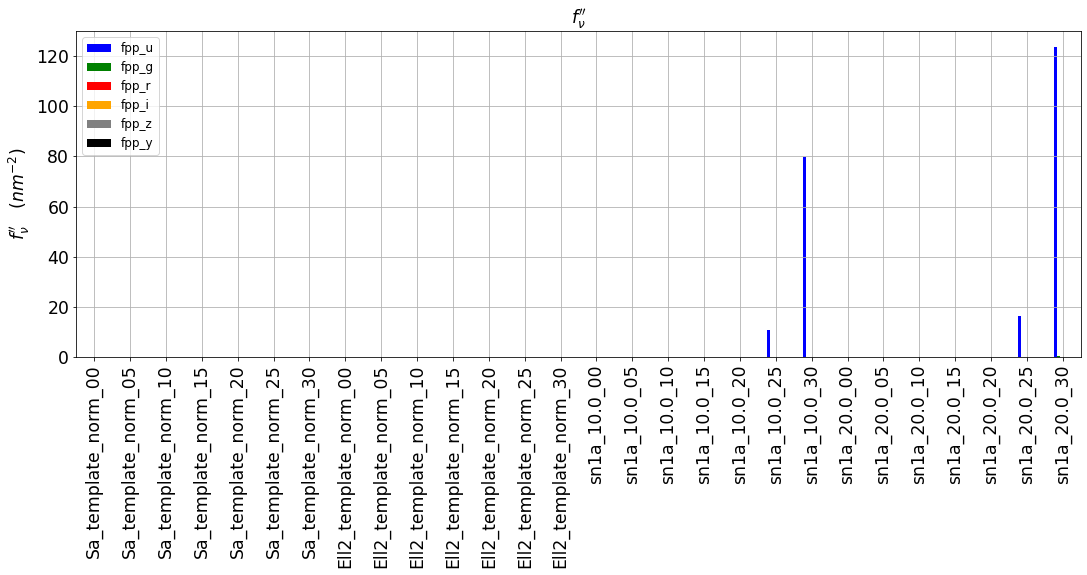

In [147]:
my_colors = list(islice(cycle(['b', 'g', 'r', 'orange','grey','k']), None, len(df_fpp)))
df_fpp.plot.bar(figsize=(18,6),ylabel="$f^{\prime\prime}_\\nu \quad (nm^{-2})$",grid=True,color=my_colors,title="$f_\\nu^{\prime\prime}$")

## Merge the three dataframe

In [148]:
df_SED_infos=pd.concat([df_SED,df_fp,df_fpp],axis=1)

In [149]:
df_SED_infos

type      fp_u      fp_g      fp_r      fp_i  \
Sa_template_norm       galaxies       NaN       NaN       NaN       NaN   
Ell2_template_norm     galaxies       NaN       NaN       NaN       NaN   
sn1a_10.0                    sn       NaN       NaN       NaN       NaN   
sn1a_20.0                    sn       NaN       NaN       NaN       NaN   
Sa_template_norm_00         NaN  0.014306  0.008547  0.002844  0.002644   
Sa_template_norm_05         NaN  0.006050  0.011490  0.010314  0.003359   
Sa_template_norm_10         NaN  0.002992  0.003958  0.009223  0.008307   
Sa_template_norm_15         NaN  0.003857  0.002039  0.003957  0.008465   
Sa_template_norm_20         NaN  0.011809  0.002546  0.001050  0.003630   
Sa_template_norm_25         NaN  0.020764  0.005568  0.001645  0.000595   
Sa_template_norm_30         NaN       NaN       NaN       NaN       NaN   
Ell2_template_norm_00       NaN  0.014341  0.006005  0.001870  0.001269   
Ell2_template_norm_05       NaN  0.010556  0.011384  0.008488  0.002260   
Ell2_template_norm_10       NaN  0.019142  0.008625  0.008770  0.007744   
Ell2_template_norm_15       NaN  0.018821  0.013412  0.006614  0.008081   
Ell2_template_norm_20       NaN  0.026272  0.015352  0.007281  0.005826   
Ell2_template_norm_25       NaN  0.018549  0.017946  0.011861  0.004716   
Ell2_template_norm_30       NaN       NaN       NaN       NaN       NaN   
sn1a_10.0_00                NaN  0.003489  0.000853 -0.001154 -0.002956   
sn1a_10.0_05                NaN  0.010247  0.003606  0.001487  0.000313   
sn1a_10.0_10                NaN  0.009723  0.007183  0.002727  0.001705   
sn1a_10.0_15                NaN  0.015417  0.007469  0.005641  0.002447   
sn1a_10.0_20                NaN  0.009896  0.009616  0.005956  0.005003   
sn1a_10.0_25                NaN  0.004522  0.010313  0.005906  0.004619   
sn1a_10.0_30                NaN  0.000612  0.007046  0.007838  0.005082   
sn1a_20.0_00                NaN  0.004263  0.001236 -0.002352 -0.002939   
sn1a_20.0_05                NaN  0.009423  0.004382  0.002139  0.000300   
sn1a_20.0_10                NaN  0.011165  0.006937  0.003339  0.002146   
sn1a_20.0_15                NaN  0.015003  0.008441  0.005278  0.003032   
sn1a_20.0_20                NaN  0.009155  0.010686  0.005557  0.004833   
sn1a_20.0_25                NaN  0.005536  0.009983  0.006952  0.004222   
sn1a_20.0_30                NaN  0.005228  0.006774  0.008555  0.005314   

                           fp_z      fp_y       fpp_u     fpp_g     fpp_r  \
Sa_template_norm            NaN       NaN         NaN       NaN       NaN   
Ell2_template_norm          NaN       NaN         NaN       NaN       NaN   
sn1a_10.0                   NaN       NaN         NaN       NaN       NaN   
sn1a_20.0                   NaN       NaN         NaN       NaN       NaN   
Sa_template_norm_00    0.002086  0.001366    0.000815  0.000027 -0.000011   
Sa_template_norm_05    0.002571  0.001451    0.000238  0.000098  0.000256   
Sa_template_norm_10    0.006385  0.002005    0.000023  0.000090  0.000014   
Sa_template_norm_15    0.004743  0.007063   -0.000084 -0.000008  0.000108   
Sa_template_norm_20    0.008105  0.004737         NaN       NaN       NaN   
Sa_template_norm_25    0.003275  0.006045         NaN       NaN       NaN   
Sa_template_norm_30         NaN       NaN         NaN       NaN       NaN   
Ell2_template_norm_00  0.001198  0.000734    0.000463 -0.000020 -0.000013   
Ell2_template_norm_05  0.001681  0.000929    0.000417  0.000079  0.000084   
Ell2_template_norm_10  0.004535  0.001492    0.000279  0.000101 -0.000008   
Ell2_template_norm_15  0.004565  0.006651    0.000280  0.000075  0.000145   
Ell2_template_norm_20  0.008467  0.003963         NaN       NaN       NaN   
Ell2_template_norm_25  0.005013  0.007237         NaN       NaN       NaN   
Ell2_template_norm_30       NaN       NaN         NaN       NaN       NaN   
sn1a_10.0_00          -0.007077 -0.004323   -0.000016 -0.000035  0.000010   
sn1a_10.0_0

# Photometric correction - Color effect vs airmass

In [150]:
all_II_diff[1]

II0       II1       II2      II10      II20
0  0.001542 -0.003025  0.604010 -0.190246  0.612819
1  0.002378 -0.019140  4.672225 -0.199907  1.481438
2  0.001157 -0.008700  1.872831 -0.098156 -0.571483
3  0.000529 -0.002342  0.722826 -0.031986 -0.328728
4  0.000277  0.001367  0.360803  0.027625  1.865911
5  0.000266 -0.004356  0.212526 -0.201233 -4.560907

## Photometric corretion with $f_\nu^\prime$ only

In [ ]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(15,NSEDTYPES*4))

old_type = None
idx_sed = -1

# loop on SED
for index_name, row in df_SED_infos.iterrows():
    the_type = row["type"]
    if the_type != old_type:
        idx_sed+=1
        old_type = the_type
        #print(f"new type {the_type} !!!")
        
    #print("\t",index_name,row["type"])
    for ifilt in range(NFILT):
        coeff_tag = "fp_"+ filter_tagnames[ifilt]
        coeff_value = df_SED_infos.loc[index_name][coeff_tag]
        DeltaMag = np.zeros(NAM)
        for idx_am,z in enumerate(all_am):
            Delta_II10 = all_II_diff[idx_am].loc[ifilt]["II10"]
            DeltaMag[idx_am] =  1.087*(Delta_II10*coeff_value)
        if ifilt==0:
            axs[idx_sed].plot(all_am,DeltaMag,color=filter_color[ifilt],label=index_name,lw=2) 
        else:
            axs[idx_sed].plot(all_am,DeltaMag,color=filter_color[ifilt],lw=2)
        
    axs[idx_sed].legend(loc=(1.01, 0.01))
    axs[idx_sed].set_xlabel("airmass")
    axs[idx_sed].set_ylabel("$f^\prime_p \Delta II_{10}$ (mag)")
    axs[idx_sed].set_title(the_type)
    axs[idx_sed].grid()
            
plt.tight_layout()        
        

## Photometric correction with $f_\nu^\prime$ and $f_\nu^{\prime\prime}$ 

### Build the columns tags

In [ ]:
from collections import OrderedDict

In [ ]:
all_columns = OrderedDict()
all_columns["name"] = 'str'
all_columns["type"] = 'str'
all_columns["filter"] = 'str'
for tag in all_am_tags:
    all_columns[f"c_1_{tag}"] = 'float'
    all_columns[f"c_2_{tag}"] = 'float'
    all_columns[f"c_3_{tag}"] = 'float'
    all_columns[f"c_t_{tag}"] = 'float'
print(all_columns)
print(len(all_columns))

### Book the dataframe

In [ ]:
all_II_diff[15]

In [ ]:
df_pc_col_airmass = pd.DataFrame(columns=all_columns)

In [ ]:
fig, axs = plt.subplots(NSEDTYPES,1,figsize=(15,NSEDTYPES*4))
K=1.087


old_type = None
idx_sed = -1
idx_type = -1

# loop on SED
for index_name, row in df_SED_infos.iterrows():
    idx_sed += 1
    the_type = row["type"]
    if the_type != old_type:
        idx_type+=1
        old_type = the_type
        #print(f"new type {the_type} !!!")
        
    #print("\t",index_name,row["type"])
    for ifilt in range(NFILT):
        
        list_to_pandas = [index_name, the_type, filter_tagnames[ifilt]]
        
        coeff_tag1 = "fp_"+ filter_tagnames[ifilt]
        coeff_value1 = df_SED_infos.loc[index_name][coeff_tag1]
        coeff_tag2 = "fpp_"+ filter_tagnames[ifilt]
        coeff_value2 = df_SED_infos.loc[index_name][coeff_tag2]
        
        
        # init before loop on airlass
        DeltaMag = np.zeros(NAM)
        # container for mags corrections
        list_data_values = []
        
        # loop on airmass to fill DeltaMag[idx_am] and data_to_pandas
        
        for idx_am,z in enumerate(all_am):
            # get integral difference between observed and standard
            Delta_II10 = all_II_diff[idx_am].loc[ifilt]["II10"]
            Delta_II20 = all_II_diff[idx_am].loc[ifilt]["II20"]
            
            c1 = K*Delta_II10*coeff_value1
            c2 = K*Delta_II20*coeff_value2
            c3 = -K/2*(Delta_II10*coeff_value1)**2
            c4 = c1+c2+c3
            
    
            # fill container for mag correction
            list_data_values.append(c1)
            list_data_values.append(c2)
            list_data_values.append(c3)
            list_data_values.append(c4)
            
            # array for plotting     
            DeltaMag[idx_am] = c4
 

        # make the list
        list_to_pandas = list_to_pandas +  list_data_values
                              
        # add the row to pandas dataframe
        df_pc_col_airmass.loc[idx_sed*6+ifilt] = list_to_pandas
              
              
        # plot for this airmass  for this SED  
        if ifilt==0:
            axs[idx_type].plot(all_am,DeltaMag,color=filter_color[ifilt],label=index_name,lw=2) 
        else:
            axs[idx_type].plot(all_am,DeltaMag,color=filter_color[ifilt],lw=2)
            
        
        
    
    axs[idx_type].legend(loc=(1.01, 0.01))
    axs[idx_type].set_xlabel("airmass")
    axs[idx_type].set_ylabel("$f^\prime_p \Delta II_{10}+ f^{\prime\prime}_p \Delta II_{20} $ (mag)")
    axs[idx_type].set_title(the_type)
    axs[idx_type].grid()
            
plt.tight_layout()        
        

In [ ]:
df_pc_col_airmass

## Error on SED approximation

### Error on Color Photometric Correction bias due to SED approximation
$$
\begin{eqnarray}
\Delta m & = & \left| 2.5 \log_{10}\left(
\frac{\mathbb{I}_0^{std}(b)}
{\mathbb{I}_0^{obs}(b)}\right) +
2.5 \log_{10} 
	\left( 
	\frac{\int_0^\infty F_\nu(\lambda) \times S_b^{obs}(\lambda) \frac{d\lambda}{\lambda} }{\int_0^\infty F_\nu(\lambda) \times S_b^{std}(\lambda) \frac{d\lambda}{\lambda}} 
	\right) \right. \nonumber \\
    & & \left. - 1.087\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) +
          \frac{f_\nu^{\prime\prime}(\lambda_b)}{2}\Delta \mathbb{I}_{20}(b) \right. 
         - \left. \frac{1}{2}\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) \right)^2             
          \right)\right|
\end{eqnarray}  
$$

$$
\begin{eqnarray}
\Delta m & = & \left| 
2.5 \log_{10} 
	\left( 
	\frac{\int_0^\infty F_\nu(\lambda) \times \phi_b^{obs}(\lambda) d\lambda}{\int_0^\infty F_\nu(\lambda) \times \phi_b^{std}(\lambda)d\lambda} 
	\right) \right. \nonumber \\
    & & \left. - 1.087\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) +
          \frac{f_\nu^{\prime\prime}(\lambda_b)}{2}\Delta \mathbb{I}_{20}(b) \right. 
         - \left. \frac{1}{2}\left( f_\nu^\prime(\lambda_b) \Delta \mathbb{I}_{10}(b) \right)^2             
          \right)\right|
\end{eqnarray}  
$$

In [ ]:
all_columns = OrderedDict()
all_columns["name"] = 'str'
all_columns["type"] = 'str'
all_columns["filter"] = 'str'
for tag in all_am_tags:
    all_columns[f"ct_{tag}"] = 'float'
print(all_columns)
print(len(all_columns))

In [ ]:
df_pc_col_bias_airmass = pd.DataFrame(columns=all_columns)

fig, axs = plt.subplots(NSEDTYPES,1,figsize=(15,NSEDTYPES*4))
K=1.087

old_type = None
idx_sed = -1


# loop on SED types
for idx_type,sed_type in enumerate(sedtypes):
    
    sednamelist = sedtypeslists[sed_type] 
    NSEDs = len(sednamelist)
    
    
    # loop on objects in sedtypes
    for idx0,sed_name in  enumerate(sednamelist):
        
        idx_sed+=1 
        
        wavel,fnu = seds[sed_name].getSED_fnu()
        
        # loop on filters
        for ifilt in range(NFILT):
            
            list_to_pandas = [sed_name, sed_type, filter_tagnames[ifilt]]
            
            coeff_tag1 = "fp_"+ filter_tagnames[ifilt]
            coeff_value1 = df_SED_infos.loc[sed_name][coeff_tag1]
            coeff_tag2 = "fpp_"+ filter_tagnames[ifilt]
            coeff_value2 = df_SED_infos.loc[sed_name][coeff_tag2]
            
            # init before loop on airlass
            DeltaMag = np.zeros(NAM)
            # container for mags corrections
            list_data_values = []
            
            #print(list_to_pandas)
            
            # loop on airmass
            for idx_am,z in enumerate(all_am):
                #print(all_df_obs[idx_am].head())
                # get integral difference between observed and standard
                
                #approximation
                Delta_II10 = all_II_diff[idx_am].loc[ifilt]["II10"]
                Delta_II20 = all_II_diff[idx_am].loc[ifilt]["II20"]
            
                c1 = K*Delta_II10*coeff_value1
                c2 = K*Delta_II20*coeff_value2
                c3 = -K/2*(Delta_II10*coeff_value1)**2
                c4 = c1+c2+c3
                
                # compute the true integral
                the_df_obs=all_df_obs[idx_am]
                result_integ1 = ComputeAverage(wavel,fnu,the_df_obs)
                result_integ2 = ComputeAverage(wavel,fnu,df_std)
                
                dm=2.5*np.log10(result_integ1[ifilt]/result_integ2[ifilt]) - c4
                
                list_data_values.append(dm)
                DeltaMag[idx_am] = dm
            
            
            # make the list
            list_to_pandas = list_to_pandas +  list_data_values
            
            # add the row to pandas dataframe
            df_pc_col_bias_airmass.loc[idx_sed*6+ifilt] = list_to_pandas
            
            # plot for this airmass  for this SED  
            if ifilt==0:
                axs[idx_type].plot(all_am,DeltaMag,color=filter_color[ifilt],label=sed_name,lw=2) 
            else:
                axs[idx_type].plot(all_am,DeltaMag,color=filter_color[ifilt],lw=2)
            
        
        
    
    axs[idx_type].legend(loc=(1.01, 0.01))
    axs[idx_type].set_xlabel("airmass")
    axs[idx_type].set_ylabel("$\Delta m$ (mag)")
    axs[idx_type].set_title(sed_type)
    axs[idx_type].grid()
            
plt.tight_layout()                
        

In [ ]:
df_pc_col_bias_airmass